hourly-daily available capacity, daily bid
prices, daily market clearing prices as well as daily aggregate demand, water storage and
inflow levels. 

In [2]:
#librerias
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# 1. Datos

## Precios declarados (daily bid prices op1)

In [3]:
#precio de mercado energia mayorista
#nota: aca seria a nivel plata y configuracion, pero el problema es que el resto no están en ese nivel
archivo = "PreciodeOfertaDeclarado.csv"
df_declarado = pd.read_csv(archivo, sep=";", encoding="utf-8")
df_declarado


,CodigoVariable,Fecha,CodigoDuracion,UnidadMedida,CodigoPlanta,Configuracion,Valor
0,POF_Declarado,18/04/2025,PT1D,COP/kWh,ESMR,0,103.76
1,POF_Declarado,18/04/2025,PT1D,COP/kWh,TDR1,0,2306.46
2,POF_Declarado,18/04/2025,PT1D,COP/kWh,URA1,0,250.00
3,POF_Declarado,18/04/2025,PT1D,COP/kWh,CLMG,0,920.00
4,POF_Declarado,18/04/2025,PT1D,COP/kWh,TFL4,4,1534.69
...,...,...,...,...,...,...,...
20029,POF_Declarado,18/06/2025,PT1D,COP/kWh,TSJ1,0,287.00
20030,POF_Declarado,18/06/2025,PT1D,COP/kWh,GVIO,0,103.50
20031,POF_Declarado,18/06/2025,PT1D,COP/kWh,MRL1,0,947.87
20032,POF_Declarado,18/06/2025,PT1D,COP/kWh,TSR1,9,887.56


In [4]:
df_declarado[df_declarado['CodigoPlanta']=='TFL4']['Configuracion'].unique()

array([4, 3, 2, 1])

In [5]:
# mi id es Planta_Configuracion
df_declarado['Planta_Configuracion'] = df_declarado['CodigoPlanta'].astype(str) + "_" + df_declarado['Configuracion'].astype(str)
df_declarado[['CodigoPlanta', 'Configuracion', 'Planta_Configuracion']]


,CodigoPlanta,Configuracion,Planta_Configuracion
0,ESMR,0,ESMR_0
1,TDR1,0,TDR1_0
2,URA1,0,URA1_0
3,CLMG,0,CLMG_0
4,TFL4,4,TFL4_4
...,...,...,...
20029,TSJ1,0,TSJ1_0
20030,GVIO,0,GVIO_0
20031,MRL1,0,MRL1_0
20032,TSR1,9,TSR1_9


In [6]:
df_declarado['Fecha'].min()

'1/04/2025'

In [7]:
df_declarado['Fecha'].max()

'9/09/2025'

In [8]:
df_declarado

,CodigoVariable,Fecha,CodigoDuracion,UnidadMedida,CodigoPlanta,Configuracion,Valor,Planta_Configuracion
0,POF_Declarado,18/04/2025,PT1D,COP/kWh,ESMR,0,103.76,ESMR_0
1,POF_Declarado,18/04/2025,PT1D,COP/kWh,TDR1,0,2306.46,TDR1_0
2,POF_Declarado,18/04/2025,PT1D,COP/kWh,URA1,0,250.00,URA1_0
3,POF_Declarado,18/04/2025,PT1D,COP/kWh,CLMG,0,920.00,CLMG_0
4,POF_Declarado,18/04/2025,PT1D,COP/kWh,TFL4,4,1534.69,TFL4_4
...,...,...,...,...,...,...,...,...
20029,POF_Declarado,18/06/2025,PT1D,COP/kWh,TSJ1,0,287.00,TSJ1_0
20030,POF_Declarado,18/06/2025,PT1D,COP/kWh,GVIO,0,103.50,GVIO_0
20031,POF_Declarado,18/06/2025,PT1D,COP/kWh,MRL1,0,947.87,MRL1_0
20032,POF_Declarado,18/06/2025,PT1D,COP/kWh,TSR1,9,887.56,TSR1_9


In [9]:
#Precio de oferta de la planta en el proceso del despacho ideal, en COP/kWh - https://www.simem.co/datadetail/B1189F52-1F3C-429B-B1C5-34AF0AC860F7
# Precio de oferta de la planta para cada configuración ofertada en el proceso del despacho ideal, en COP/kWh - https://www.simem.co/datadetail/B180058C-52DD-42C3-A93A-F44003AA2D43

## Precio de oferta de la planta en el proceso del despacho ideal, en COP/kWh (daily bid prices op2)

In [10]:
#nota: acá sería a nivel planta y no desgloso configuracion, una planta y ya 
archivo_oferta = "Preciodeofertaplanta.csv"
df_oferta = pd.read_csv(archivo_oferta, sep=",", encoding="utf-8")
df_oferta
#2024-09-01

,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,CodigoPlanta,Version,Valor
0,POf_Original,2025-05-25 23:00:00,P1D,COP/kWh,TEC1,TXF,1486.46
1,POf_Original,2025-05-25 22:00:00,P1D,COP/kWh,TEC1,TXF,1486.46
2,POf_Original,2025-05-25 21:00:00,P1D,COP/kWh,TEC1,TXF,1486.46
3,POf_Original,2025-05-25 20:00:00,P1D,COP/kWh,TEC1,TXF,1486.46
4,POf_Original,2025-05-25 19:00:00,P1D,COP/kWh,TEC1,TXF,1486.46
...,...,...,...,...,...,...,...
670603,POf_Original,2025-07-13 04:00:00,P1D,COP/kWh,ZPA2,TX4,379.71
670604,POf_Original,2025-07-13 03:00:00,P1D,COP/kWh,ZPA2,TX4,379.71
670605,POf_Original,2025-07-13 02:00:00,P1D,COP/kWh,ZPA2,TX4,379.71
670606,POf_Original,2025-07-13 01:00:00,P1D,COP/kWh,ZPA2,TX4,379.71


## Precio de bolsa horario (daily market clearing prices)

In [11]:
#precio mercado spot
archivo_bolsa = "Preciodebolsahorario.csv"
df_bolsa = pd.read_csv(archivo_bolsa, sep=",", encoding="utf-8")
df_bolsa

,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor
0,PB_Int,2025-06-01 00:00:00,PT1H,COP/kWh,TX2,193.75
1,PB_Int,2025-06-01 01:00:00,PT1H,COP/kWh,TX2,193.75
2,PB_Int,2025-06-01 02:00:00,PT1H,COP/kWh,TX2,193.75
3,PB_Int,2025-06-01 03:00:00,PT1H,COP/kWh,TX2,193.75
4,PB_Int,2025-06-01 04:00:00,PT1H,COP/kWh,TX2,193.75
...,...,...,...,...,...,...
59443,PB_Tie,2025-05-18 19:00:00,PT1H,COP/kWh,TXF,106.39
59444,PB_Tie,2025-05-18 20:00:00,PT1H,COP/kWh,TXF,106.39
59445,PB_Tie,2025-05-18 21:00:00,PT1H,COP/kWh,TXF,106.39
59446,PB_Tie,2025-05-18 22:00:00,PT1H,COP/kWh,TXF,102.64


## Disponibilidad Comercial por Planta (hourly-daily available capacity)

Es la disponibilidad calculada por el Sistema de Intercambios Comerciales, la cual considera la declaración de disponibilidad de las plantas de generación, modificada cuando se presenten cambios en las unidades de generación en la operación real del sistema resolución CREG 024 del 095

Saber cuánta energía puede generar cada planta en cada hora

In [12]:
#https://www.simem.co/datadetail/24F4EC70-2DA0-4551-A188-FA750A7D66A5

julio = pd.read_csv("Disponibilidadcomercialporplantajulio.csv", sep=',', encoding='utf-8')
septiembre = pd.read_csv("Disponibilidadcomercialporplantaseptiembre.csv", sep=',', encoding='utf-8')

# Concatenar verticalmente
df_capacity = pd.concat([julio, septiembre], axis=0)

# Eliminar duplicados exactos
df_capacity = df_capacity.drop_duplicates()
df_capacity = df_capacity.reset_index(drop=True)
df_capacity


#nota: si hay algo que no aparezca es porque sus cantidades disponibles en esa hora eran 0



,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor,CodigoPlanta
0,DispCom,2025-05-25 16:00:00,PT1H,kWh,TX3,148.56,3ACC
1,DispCom,2025-05-25 15:00:00,PT1H,kWh,TX3,2706.61,3ACC
2,DispCom,2025-05-25 14:00:00,PT1H,kWh,TX3,3574.43,3ACC
3,DispCom,2025-05-25 13:00:00,PT1H,kWh,TX3,3642.49,3ACC
4,DispCom,2025-05-25 12:00:00,PT1H,kWh,TX3,5078.19,3ACC
...,...,...,...,...,...,...,...
2946659,DispCom,2025-08-10 04:00:00,PT1H,kWh,TX1,2825.03,VNTB
2946660,DispCom,2025-08-10 03:00:00,PT1H,kWh,TX1,2842.82,VNTB
2946661,DispCom,2025-08-10 02:00:00,PT1H,kWh,TX1,2855.33,VNTB
2946662,DispCom,2025-08-10 01:00:00,PT1H,kWh,TX1,2869.57,VNTB


In [13]:
#verificando que estas sean las capacidades declaradas, porque despues aparecen en equilibrio. Rta: sí coinciden

In [14]:
df_capacity[
    (df_capacity['CodigoPlanta'] == '2QBW') &
    (df_capacity['FechaHora'].astype(str).str.contains('2025-08-11 00:00:00'))
]

,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor,CodigoPlanta
2257328,DispCom,2025-08-11 00:00:00,PT1H,kWh,TX2,18008.4,2QBW
2263080,DispCom,2025-08-11 00:00:00,PT1H,kWh,TX1,18008.4,2QBW


In [15]:
df_capacity[
    (df_capacity['CodigoPlanta'] == '2QEK') &
    (df_capacity['FechaHora'].astype(str).str.contains('2025-08-11 00:00:00'))
]

,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor,CodigoPlanta
2253197,DispCom,2025-08-11 00:00:00,PT1H,kWh,TX2,35000.0,2QEK
2261712,DispCom,2025-08-11 00:00:00,PT1H,kWh,TX1,35000.0,2QEK


## Pronóstico del CND de demanda por Área operativa (daily aggregate demand)

In [16]:
#https://www.simem.co/datadetail/A016BAC9-EAA1-45BB-8DB2-AE01600E1D18
archivo_pronostico= "PronósticodelCNDdedemandaporÁreaoperativa.csv"
df_pronostico = pd.read_csv(archivo_pronostico, sep=",", encoding="utf-8")
df_pronostico



,FechaPublicacion,FechaHora,CodigoDuracion,CodigoAreaOperativa,PronDem
0,2025-05-01,2025-04-05 00:00:00,PT1H,Are0002,1017494.3
1,2025-05-01,2025-04-05 01:00:00,PT1H,Are0002,975345.5
2,2025-05-01,2025-04-05 02:00:00,PT1H,Are0002,946246.0
3,2025-05-01,2025-04-05 03:00:00,PT1H,Are0002,937971.4
4,2025-05-01,2025-04-05 04:00:00,PT1H,Are0002,963633.8
...,...,...,...,...,...
19435,2025-06-01,2025-05-22 19:00:00,PT1H,Are0128,2325697.5
19436,2025-06-01,2025-05-22 20:00:00,PT1H,Are0128,2237126.5
19437,2025-06-01,2025-05-22 21:00:00,PT1H,Are0128,2014845.2
19438,2025-06-01,2025-05-22 22:00:00,PT1H,Are0128,1825030.4


In [17]:
df_pronostico_agg = (
    df_pronostico.groupby("FechaHora", as_index=False)["PronDem"]
      .sum()
      .rename(columns={"PronDem": "daily_agg_demand"})
)
df_pronostico_agg #lo que se pronosticó demandado

,FechaHora,daily_agg_demand
0,2025-04-01 00:00:00,8381365.2
1,2025-04-01 01:00:00,8102281.3
2,2025-04-01 02:00:00,7913273.6
3,2025-04-01 03:00:00,7823041.2
4,2025-04-01 04:00:00,7999010.4
...,...,...
3883,2025-09-09 19:00:00,11599381.0
3884,2025-09-09 20:00:00,11396855.1
3885,2025-09-09 21:00:00,10584341.3
3886,2025-09-09 22:00:00,9935794.2


## Despacho programado recursos de generación (cantidades de equilibrio)


Contiene el programa de generación del despacho económico en kW, cotejar info con pronostico CND, tmb insumo para cantidades declaradas

In [18]:
#https://www.simem.co/datadetail/FF027B64-9896-4844-B827-9DC05F690668
archivo_despacho = "Despachoprogramadorecursosdegeneracion.csv"
df_despacho = pd.read_csv(archivo_despacho, sep=",", encoding="utf-8")
df_despacho
#valor es kW

,FechaHora,CodigoDuracion,CodigoElementoGeneracion,Valor
0,2025-08-11 00:00:00,PT1H,2QBW,18380
1,2025-08-11 00:00:00,PT1H,2QEK,35000
2,2025-08-11 00:00:00,PT1H,2QRL,650
3,2025-08-11 00:00:00,PT1H,2QV2,6000
4,2025-08-11 00:00:00,PT1H,2R22,18000
...,...,...,...,...
1264514,2025-04-05 23:00:00,PT1H,SLVJ,95000
1264515,2025-04-05 23:00:00,PT1H,SMI1,25000
1264516,2025-04-05 23:00:00,PT1H,SNC1,700
1264517,2025-04-05 23:00:00,PT1H,SNCR,729000


In [19]:
df_despacho_agg = (
    df_despacho.groupby("FechaHora", as_index=False)["Valor"]
      .sum()
      .rename(columns={"Valor": "daily_eq_demand"})
)
df_despacho_agg #fue lo que se despachó al final demandado

,FechaHora,daily_eq_demand
0,2025-04-01 00:00:00,8634480
1,2025-04-01 01:00:00,8343930
2,2025-04-01 02:00:00,8149800
3,2025-04-01 03:00:00,8060810
4,2025-04-01 04:00:00,8231010
...,...,...
3883,2025-09-09 19:00:00,11822380
3884,2025-09-09 20:00:00,11697040
3885,2025-09-09 21:00:00,11140860
3886,2025-09-09 22:00:00,10420020


In [20]:
df_despacho[df_despacho['CodigoElementoGeneracion']=='TFL4']

,FechaHora,CodigoDuracion,CodigoElementoGeneracion,Valor
8275,2025-07-02 01:00:00,PT1H,TFL4,120000
8582,2025-07-02 02:00:00,PT1H,TFL4,120000
8889,2025-07-02 03:00:00,PT1H,TFL4,120000
9196,2025-07-02 04:00:00,PT1H,TFL4,120000
9393,2025-07-02 05:00:00,PT1H,TFL4,120000
...,...,...,...,...
1263238,2025-04-05 17:00:00,PT1H,TFL4,0
1263578,2025-04-05 19:00:00,PT1H,TFL4,0
1263820,2025-04-05 20:00:00,PT1H,TFL4,0
1264020,2025-04-05 21:00:00,PT1H,TFL4,0


In [21]:
#otras opciones: Demanda comercial, en kWh. Demanda real, en kWh.

## Reservas hidraulicas

In [22]:
#https://www.simem.co/datadetail/9605B04C-8D3A-40A9-94D3-5535670D2F9A
archivo_hidraulica = "ReservasHidráulicas.csv"
df_hidraulica = pd.read_csv(archivo_hidraulica, sep=",", encoding="utf-8")
df_hidraulica


,FechaPublicacion,Fecha,CodigoDuracion,CodigoEmbalse,RegionHidrologica,VolumenUtilDiarioMasa,VolumenTotalMasa
0,2025-06-29,2025-06-28,P1D,ALTOANCH,Valle,11200000,17520000
1,2025-06-29,2025-06-28,P1D,ITUANGO,Antioquia,116260000,1415260000
2,2025-06-29,2025-06-28,P1D,PUNCHINA,Antioquia,42210000,56190000
3,2025-06-29,2025-06-28,P1D,PORCE3,Antioquia,79080000,108530000
4,2025-06-29,2025-06-28,P1D,BETANIA,Centro,673527000,1129027000
...,...,...,...,...,...,...,...
4353,2025-08-26,2025-08-25,P1D,TOMINE,CENTRO,398310000,398310000
4354,2025-08-26,2025-08-25,P1D,TRONERAS,Antioquia,7740000,16190000
4355,2025-08-26,2025-08-25,P1D,MUNA,Centro,11910000,11990000
4356,2025-08-26,2025-08-25,P1D,PORCE2,Antioquia,50140000,88930000


In [23]:
df_hidraulica_avg= (
    df_hidraulica
    .groupby('Fecha', as_index=False)[['VolumenUtilDiarioMasa', 'VolumenTotalMasa']]
    .mean()
)


Dias similares

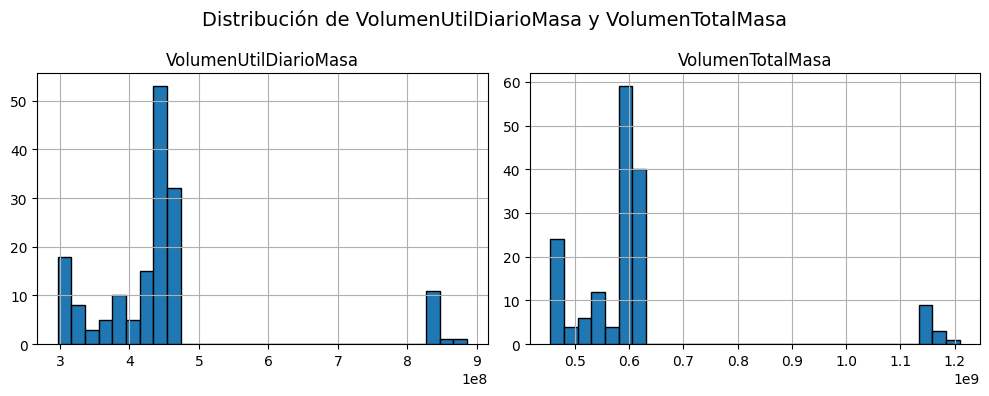

In [24]:
import matplotlib.pyplot as plt

# Lista de variables a graficar
vars_plot = ['VolumenUtilDiarioMasa', 'VolumenTotalMasa']

# Crea los histogramas uno al lado del otro
df_hidraulica_avg[vars_plot].hist(
    bins=30,           # número de barras
    figsize=(10, 4),   # tamaño del gráfico
    edgecolor='black'  # bordes para mejor visibilidad
)

plt.suptitle('Distribución de VolumenUtilDiarioMasa y VolumenTotalMasa', fontsize=14)
plt.tight_layout()
plt.show()


In [25]:
from sklearn.cluster import KMeans
import pandas as pd

# 1. Seleccionar la variable
X = df_hidraulica_avg[['VolumenUtilDiarioMasa']].values

# 2. Aplicar K-Means con 12 grupos
kmeans = KMeans(n_clusters=12, random_state=42)
df_hidraulica_avg['cluster'] = kmeans.fit_predict(X)

# 3. Reordenar los clusters según el valor medio (1 = menor, 12 = mayor)
cluster_means = (
    df_hidraulica_avg.groupby('cluster')['VolumenUtilDiarioMasa']
    .mean()
    .sort_values()
)
orden_map = {old: new + 1 for new, old in enumerate(cluster_means.index)}
df_hidraulica_avg['cluster'] = df_hidraulica_avg['cluster'].map(orden_map)

# 4. Verificar
print(df_hidraulica_avg[['Fecha', 'VolumenUtilDiarioMasa', 'cluster']].head())

# 5. Resumen por cluster
resumen = (
    df_hidraulica_avg.groupby('cluster')['VolumenUtilDiarioMasa']
    .agg(['count', 'mean', 'min', 'max'])
    .sort_index()
)
print(resumen)


        Fecha  VolumenUtilDiarioMasa  cluster
0  2025-04-01           2.969186e+08        1
1  2025-04-02           2.970081e+08        1
2  2025-04-03           2.971947e+08        1
3  2025-04-04           2.981375e+08        1
4  2025-04-05           3.019760e+08        1
         count          mean           min           max
cluster                                                 
1           24  3.099078e+08  2.969186e+08  3.217660e+08
2            5  3.377511e+08  3.241564e+08  3.503973e+08
3            6  3.670548e+08  3.582817e+08  3.764841e+08
4           13  3.950024e+08  3.882780e+08  4.060557e+08
5           14  4.239925e+08  4.119788e+08  4.286237e+08
6           37  4.384967e+08  4.323997e+08  4.414406e+08
7           12  4.456888e+08  4.423426e+08  4.487055e+08
8           25  4.548213e+08  4.503221e+08  4.596065e+08
9           13  4.644893e+08  4.600609e+08  4.722815e+08
10           8  8.354724e+08  8.315556e+08  8.396919e+08
11           4  8.455813e+08  8.409993e+

In [26]:
df_hidraulica_avg

,Fecha,VolumenUtilDiarioMasa,VolumenTotalMasa,cluster
0,2025-04-01,2.969186e+08,4.542842e+08,1
1,2025-04-02,2.970081e+08,4.544695e+08,1
2,2025-04-03,2.971947e+08,4.545602e+08,1
3,2025-04-04,2.981375e+08,4.564693e+08,1
4,2025-04-05,3.019760e+08,4.593416e+08,1
...,...,...,...,...
157,2025-09-05,8.368711e+08,1.151515e+09,10
158,2025-09-06,8.368356e+08,1.151479e+09,10
159,2025-09-07,8.450015e+08,1.159645e+09,11
160,2025-09-08,8.504281e+08,1.165072e+09,11


In [27]:
df_hidraulica['Fecha'].min()

'2025-04-01'

# 2. Procesamiento de datos

In [28]:
df_oferta[['FechaHora', 'CodigoPlanta', 'Valor']]

,FechaHora,CodigoPlanta,Valor
0,2025-05-25 23:00:00,TEC1,1486.46
1,2025-05-25 22:00:00,TEC1,1486.46
2,2025-05-25 21:00:00,TEC1,1486.46
3,2025-05-25 20:00:00,TEC1,1486.46
4,2025-05-25 19:00:00,TEC1,1486.46
...,...,...,...
670603,2025-07-13 04:00:00,ZPA2,379.71
670604,2025-07-13 03:00:00,ZPA2,379.71
670605,2025-07-13 02:00:00,ZPA2,379.71
670606,2025-07-13 01:00:00,ZPA2,379.71


In [29]:
df_bolsa[['FechaHora', 'Valor']]

,FechaHora,Valor
0,2025-06-01 00:00:00,193.75
1,2025-06-01 01:00:00,193.75
2,2025-06-01 02:00:00,193.75
3,2025-06-01 03:00:00,193.75
4,2025-06-01 04:00:00,193.75
...,...,...
59443,2025-05-18 19:00:00,106.39
59444,2025-05-18 20:00:00,106.39
59445,2025-05-18 21:00:00,106.39
59446,2025-05-18 22:00:00,102.64


In [30]:
df_despacho_agg['daily_eq_demand']

0        8634480
1        8343930
2        8149800
3        8060810
4        8231010
          ...   
3883    11822380
3884    11697040
3885    11140860
3886    10420020
3887     9877640
Name: daily_eq_demand, Length: 3888, dtype: int64

In [31]:
df_capacity[['FechaHora','Valor', 'CodigoPlanta']]

,FechaHora,Valor,CodigoPlanta
0,2025-05-25 16:00:00,148.56,3ACC
1,2025-05-25 15:00:00,2706.61,3ACC
2,2025-05-25 14:00:00,3574.43,3ACC
3,2025-05-25 13:00:00,3642.49,3ACC
4,2025-05-25 12:00:00,5078.19,3ACC
...,...,...,...
2946659,2025-08-10 04:00:00,2825.03,VNTB
2946660,2025-08-10 03:00:00,2842.82,VNTB
2946661,2025-08-10 02:00:00,2855.33,VNTB
2946662,2025-08-10 01:00:00,2869.57,VNTB


In [32]:
# Renombrar columnas antes del merge
df_oferta_renamed = df_oferta[['FechaHora', 'CodigoPlanta', 'Valor']].rename(columns={'Valor': 'precio'})
df_capacity_renamed = df_capacity[['FechaHora','Valor', 'CodigoPlanta']].rename(columns={'Valor': 'cantidad'})

df_merged = df_oferta_renamed.merge(
    df_capacity_renamed,
    on=['FechaHora', 'CodigoPlanta'],
    how='left'
)

# Reemplazar NaN en cantidad por 0
df_merged['cantidad'] = df_merged['cantidad'].fillna(0)
df_merged = df_merged.drop_duplicates(subset=['FechaHora', 'CodigoPlanta'], keep='first')
df_merged


,FechaHora,CodigoPlanta,precio,cantidad
0,2025-05-25 23:00:00,TEC1,1486.46,213000.0
3,2025-05-25 22:00:00,TEC1,1486.46,213000.0
6,2025-05-25 21:00:00,TEC1,1486.46,213000.0
9,2025-05-25 20:00:00,TEC1,1486.46,213000.0
12,2025-05-25 19:00:00,TEC1,1486.46,213000.0
...,...,...,...,...
1817655,2025-07-13 04:00:00,TGJ1,557.16,0.0
1817656,2025-07-13 03:00:00,TGJ1,557.16,0.0
1817657,2025-07-13 02:00:00,TGJ1,557.16,0.0
1817658,2025-07-13 01:00:00,TGJ1,557.16,0.0


In [33]:
df_merged['Fecha'] = pd.to_datetime(df_merged['FechaHora']).dt.date

In [34]:
df_hidraulica_avg['Fecha'] = pd.to_datetime(df_hidraulica_avg['Fecha']).dt.date

Merges

In [35]:
df_final = pd.merge(
    df_merged,
    df_hidraulica_avg[['Fecha', 'cluster']],
    on='Fecha',
    how='inner'
)
df_final

,FechaHora,CodigoPlanta,precio,cantidad,Fecha,cluster
0,2025-05-25 23:00:00,TEC1,1486.46,213000.0,2025-05-25,5
1,2025-05-25 22:00:00,TEC1,1486.46,213000.0,2025-05-25,5
2,2025-05-25 21:00:00,TEC1,1486.46,213000.0,2025-05-25,5
3,2025-05-25 20:00:00,TEC1,1486.46,213000.0,2025-05-25,5
4,2025-05-25 19:00:00,TEC1,1486.46,213000.0,2025-05-25,5
...,...,...,...,...,...,...
307147,2025-07-13 04:00:00,TGJ1,557.16,0.0,2025-07-13,9
307148,2025-07-13 03:00:00,TGJ1,557.16,0.0,2025-07-13,9
307149,2025-07-13 02:00:00,TGJ1,557.16,0.0,2025-07-13,9
307150,2025-07-13 01:00:00,TGJ1,557.16,0.0,2025-07-13,9


In [36]:
df_despacho[df_despacho['CodigoElementoGeneracion'] == 'TEC1']

,FechaHora,CodigoDuracion,CodigoElementoGeneracion,Valor
45566,2025-04-24 00:00:00,PT1H,TEC1,0
45942,2025-04-24 01:00:00,PT1H,TEC1,0
46138,2025-04-24 02:00:00,PT1H,TEC1,0
46468,2025-04-24 03:00:00,PT1H,TEC1,0
46703,2025-04-24 04:00:00,PT1H,TEC1,0
...,...,...,...,...
1263236,2025-04-05 17:00:00,PT1H,TEC1,0
1263576,2025-04-05 19:00:00,PT1H,TEC1,0
1263818,2025-04-05 20:00:00,PT1H,TEC1,0
1264018,2025-04-05 21:00:00,PT1H,TEC1,0


In [37]:
#verificacion
df_despacho[
    (df_despacho['CodigoElementoGeneracion'] == 'TEC1') &
    (df_despacho['FechaHora'].str.contains('2025-05-25'))
]

#no aparece, en realidad no despacha porque es que está por encima del precio de cierre, muy por encima entonces no se toma

,FechaHora,CodigoDuracion,CodigoElementoGeneracion,Valor


In [38]:
#transado en el cierre

df_transado = pd.merge(
    df_bolsa[['FechaHora', 'Valor']],
    df_despacho_agg[['FechaHora', 'daily_eq_demand']],
    on='FechaHora',
    how='left'
)
df_transado = df_transado.rename(columns={
    'Valor': 'precio',
    'daily_eq_demand': 'demanda'
})

df_transado

,FechaHora,precio,demanda
0,2025-06-01 00:00:00,193.75,8415370
1,2025-06-01 01:00:00,193.75,8105260
2,2025-06-01 02:00:00,193.75,7921330
3,2025-06-01 03:00:00,193.75,7750260
4,2025-06-01 04:00:00,193.75,7630180
...,...,...,...
59443,2025-05-18 19:00:00,106.39,10162760
59444,2025-05-18 20:00:00,106.39,10115880
59445,2025-05-18 21:00:00,106.39,9423060
59446,2025-05-18 22:00:00,102.64,8997340


In [39]:
df_final=df_final[df_final['cantidad']!=0]

In [40]:
# Asegurarse de que las columnas 'FechaHora' sean datetime
df_final['FechaHora'] = pd.to_datetime(df_final['FechaHora'])
df_transado['FechaHora'] = pd.to_datetime(df_transado['FechaHora'])

# Filtrar df_transado: solo fechas que aparecen en df_final
df_transado_filtrado = df_transado[df_transado['FechaHora'].isin(df_final['FechaHora'])]

# Filtrar df_final: solo fechas que aparecen en df_transado_filtrado
df_final_filtrado = df_final[df_final['FechaHora'].isin(df_transado_filtrado['FechaHora'])]


C:\Users\HP\AppData\Local\Temp\ipykernel_44220\3090825170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['FechaHora'] = pd.to_datetime(df_final['FechaHora'])


# 3. Estimation 

logica: miro una fecha y un bidder, miro sus competidores, busco dias similares y comportamiento de sus competidores. Despues miro M muestra boostratps, como escenarios y veo el equilibrio, de como juegan sus competidores. Después miro, en cada una de esas M muestras bootstratps para ese dia hallo la derivada, despues hago el promedio sobre todas las muestras bootstratps. Depues hago la suma sobre todas las horas y eso va a ser el phi, con los otros terminos

### 7. Correr sobre toda la base

In [41]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from joblib import Parallel, delayed
from scipy.stats import norm


# ----------------------------------------------------
# FUNCIONES AUXILIARES
# ----------------------------------------------------

def get_cluster_it(df, fecha, firma):
    """Devuelve el cluster correspondiente a una firma i en una FechaHora t."""
    row = df.loc[
        (df['FechaHora'] == fecha) & (df['CodigoPlanta'] == firma),
        'cluster'
    ]
    return row.iloc[0] if not row.empty else np.nan


def get_competitors(df, fecha, firma):
    """Devuelve los competidores (otros CodigoPlanta) presentes en la misma FechaHora."""
    df_day = df[df['FechaHora'] == fecha]
    competitors = df_day.loc[df_day['CodigoPlanta'] != firma, 'CodigoPlanta'].unique().tolist()
    return competitors


def get_similar_days_by_cluster(df, fecha, firma, max_obs=20):
    """
    Busca días similares según el cluster del competidor k != i.
    Para cada competidor en t, extrae observaciones con el mismo cluster que i.
    """
    cluster_it = get_cluster_it(df, fecha, firma)
    competitors = get_competitors(df, fecha, firma)
    similar_obs = []

    for comp in competitors:
        df_comp_similar = df[
            (df['CodigoPlanta'] == comp) & (df['cluster'] == cluster_it)
        ].copy()

        if len(df_comp_similar) > max_obs:
            df_comp_similar = df_comp_similar.sample(n=max_obs, random_state=42)

        df_comp_similar['competidor_de'] = firma
        df_comp_similar['fecha_base'] = fecha
        similar_obs.append(df_comp_similar)

    return pd.concat(similar_obs, ignore_index=True) if similar_obs else pd.DataFrame()


def bootstrap_by_planta(df, M, seed=None):
    """Genera M muestras bootstrap independientes seleccionando 1 observación por planta."""
    if seed is not None:
        np.random.seed(seed)

    plantas = df['CodigoPlanta'].unique()
    bootstrap_samples = []

    for m in range(M):
        muestras = []
        for p in plantas:
            df_p = df[df['CodigoPlanta'] == p]
            if len(df_p) == 0:
                continue
            muestra = df_p.sample(1, replace=True)
            muestra['bootstrap_id'] = m + 1
            muestras.append(muestra)
        sample_df = pd.concat(muestras).reset_index(drop=True)
        bootstrap_samples.append(sample_df)

    return bootstrap_samples


def compute_equilibrium(df_offers, df_transado_date):
    """
    Encuentra el precio y cantidad de equilibrio (p*, q*) para un conjunto de ofertas.
    df_transado_date debe contener la demanda para la FechaHora actual.
    """
    fecha = df_offers['FechaHora'].iloc[0]
    demanda_row = df_transado_date.loc[df_transado_date['FechaHora'] == fecha, 'demanda']

    if demanda_row.empty:
        return np.nan, np.nan

    demand = demanda_row.iloc[0]
    df_sorted = df_offers.sort_values('precio').copy()
    df_sorted['acum'] = df_sorted['cantidad'].cumsum()

    clearing_offers = df_sorted[df_sorted['acum'] >= demand]
    if clearing_offers.empty:
        return np.nan, demand

    p_star = clearing_offers.iloc[0]['precio']
    q_star = demand
    return p_star, q_star

# ----------------------------------------------------
# KERNELS
# ----------------------------------------------------
# --- 1. Definiciones del Kernel ---

def gaussian_kernel(u):
    """Kernel Gaussiano estándar (PDF de N(0, 1))."""
    return norm.pdf(u)

def gaussian_kernel_prime(u):
    """Derivada del Kernel Gaussiano: κ'(u) = -u * κ(u)."""
    return -abs(u) * gaussian_kernel(u)   #ya es como si tuviera el negativo, u lo reescribo como  pht-pkt por justificacion

# --- 2. Estimación de la Demanda Residual (RD(p)) ---

# Asumo que tienes una función para obtener pos_it, o que se añade como argumento

def kernel_expectation(df, p_ht, gamma, firma_i):
    """
    Calcula la Curva de Demanda Residual Neta (RD(p) - pos_it) para la firma i.
    """
    pos_it=0
    
    if df.empty:
        # RD(p) = 0 si no hay rivales
        return 0.0 - pos_it

    u_others = (p_ht - df["precio"]) / gamma
    weights_others = gaussian_kernel(u_others) 
    
    numerator = (df["cantidad"] * weights_others).sum()
    denominator = weights_others.sum()
    
    if denominator == 0:
        RD_p = 0.0
    else:
        RD_p = numerator / denominator

    # 2. Restar la posición pre-existente al valor esperado de la cantidad asignada
    RD_neta = RD_p - pos_it
    
    return RD_neta

# --- 3. Estimación de la Derivada de la Demanda Residual (RD'(p)) ---

def kernel_derivative(df, p_ht, gamma, firma_i):
    """
    Calcula la derivada de la Curva de Demanda Residual (RD'(p)) para la firma i en p_ht.
    Usa el Estimador de Suma Ponderada sobre *solo* los rivales.
    
    RD'(p) = (1/h) * Σ_{k≠i} Q_k * κ'(u_k)
    """
    
    if df.empty:
        return 0.0

    u_others = (p_ht - df["precio"]) / gamma
    
    weights_prime_others = gaussian_kernel_prime(u_others) # Derivada del kernel: κ'(u)
    
    dQ_residual = (1 / gamma) * (df["cantidad"] * weights_prime_others).sum()
    
    return dQ_residual

# ----------------------------------------------------
# PROMEDIO SOBRE BOOTSTRAPS
# ----------------------------------------------------

def average_numerador_denom(df_bootstrap_list, df_sim, fecha_hora_i_t, gamma, firma):
    """
    Promedia el numerador y denominador kernelizados sobre varias muestras bootstrap.
    Devuelve el promedio (numer, denom) y el último p*, q* observados.
    """
    if not df_bootstrap_list:
        return np.nan, np.nan, None, None

    muestras=len(df_bootstrap_list) 
    df_firma = df_sim[
            (df_sim['CodigoPlanta'] == firma) &
            (df_sim['FechaHora'] == fecha_hora_i_t)
        ]
    b_it = df_firma['precio'].iloc[0]

    numeradores = []
    denominadores = []

    # Precomputar para cada bootstrap (vectorizado en el sentido de loops limpios)
    for df_sim in df_bootstrap_list:

        # Numerador ≈ E[-it][Q | s, p = b_it]
        numer = kernel_expectation(df_sim, b_it, gamma, firma)

        # Denominador ≈ E[-it][dQ/db | s, p = b_it]
        denom = kernel_derivative(df_sim, b_it, gamma, firma)

        numeradores.append(numer)
        denominadores.append(denom)

    # Convertir a vectores numpy
    numeradores = np.array(numeradores)
    denominadores = np.array(denominadores)

    # Promedios
    avg_numer = numeradores.mean()
    avg_denom = denominadores.mean()

    return avg_numer, avg_denom, numeradores, denominadores
   



In [42]:
from joblib import Parallel, delayed
from tqdm.auto import tqdm
from tqdm_joblib import tqdm_joblib

# ----------------------------------------------------
# FUNCIÓN PRINCIPAL
# ----------------------------------------------------

# Función auxiliar para el trabajo de una sola fila
def process_row(row, df_full, gamma, M):
    fecha = row.FechaHora          # <-- antes row['FechaHora']
    firma = row.CodigoPlanta       # <-- antes row['CodigoPlanta']
    
    # 1) Días similares
    df_similares = get_similar_days_by_cluster(df_full, fecha, firma)
    
    # 2) Bootstraps
    df_bootstrap_list = bootstrap_by_planta(df_similares, M, seed=123)

    # 3) RD(b_it) y RD'(b_it) promedio
    avg_numer, avg_denom, _, _ = average_numerador_denom(
        df_bootstrap_list,
        df_full,
        fecha,
        gamma,
        firma
    )
    
    return avg_numer, avg_denom


def calcular_avg_Q_y_dQdb_parallel(df, gamma, M, seed=123, n_jobs=-1):

    with tqdm_joblib(tqdm(total=len(df), desc="Calculando", unit="fila")):
        results = Parallel(n_jobs=n_jobs, backend='loky')(
            delayed(process_row)(row, df, gamma, M) 
            for row in df.itertuples(index=False)  # iteramos como tu querías
        )

    # Separar resultados
    EQ_results = [res[0] for res in results]
    dQdb_results = [res[1] for res in results]

    # Agregar al DataFrame
    df['EQpos'] = EQ_results
    df['EdQb'] = dQdb_results
    
    return df


## Con submuestra

In [43]:

# Filtrar solo filas del 25 de mayo de cualquier año o específico 2025
df_filtrado = df_final[
    (df_final['FechaHora'].dt.year == 2025) &
    (df_final['FechaHora'].dt.month == 5) &
    (df_final['FechaHora'].dt.day >= 5) &
    (df_final['FechaHora'].dt.day <= 6)
]


In [44]:
df_filtrado = df_filtrado.sort_values(
    by=['CodigoPlanta', 'FechaHora'], 
    ascending=[True, True]
).reset_index(drop=True)



df_result = calcular_avg_Q_y_dQdb(
    df=df_filtrado,
    gamma=10,
    M=1,
    seed=42  # Muestra prints solo para las 10 primeras observaciones
)


In [45]:


df_resultado = calcular_avg_Q_y_dQdb_parallel(
    df=df_filtrado, 
    gamma=10, 
    M=1, 
    n_jobs=-1
)


Calculando:   0%|          | 0/3141 [00:00<?, ?fila/s]

  0%|          | 0/3141 [00:00<?, ?it/s]

In [46]:
df_resultado

,FechaHora,CodigoPlanta,precio,cantidad,Fecha,cluster,EQpos,EdQb
0,2025-05-05 00:00:00,2QEK,102.64,35000.0,2025-05-05,3,363890.586244,-27387.999583
1,2025-05-05 01:00:00,2QEK,102.64,35000.0,2025-05-05,3,375382.698137,-27361.118483
2,2025-05-05 02:00:00,2QEK,102.64,35000.0,2025-05-05,3,375382.698137,-27361.118483
3,2025-05-05 03:00:00,2QEK,102.64,35000.0,2025-05-05,3,375382.698137,-27361.118483
4,2025-05-05 04:00:00,2QEK,102.64,35000.0,2025-05-05,3,375382.698137,-27361.118483
...,...,...,...,...,...,...,...,...
3136,2025-05-06 19:00:00,ZPA5,339.39,63000.0,2025-05-06,9,146400.651650,-4670.005658
3137,2025-05-06 20:00:00,ZPA5,339.39,63000.0,2025-05-06,9,146400.651650,-4670.005658
3138,2025-05-06 21:00:00,ZPA5,339.39,63000.0,2025-05-06,9,146400.651650,-4670.005658
3139,2025-05-06 22:00:00,ZPA5,339.39,63000.0,2025-05-06,9,146400.651650,-4670.005658


### Guardar los resultados

In [47]:


# Crear carpeta principal
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

# Calcular número de fechas únicas
n_fechas = df_filtrado["Fecha"].nunique()

# Crear subcarpeta con el número de fechas únicas
sub_dir = os.path.join(output_dir, f"fechas_{n_fechas}")
os.makedirs(sub_dir, exist_ok=True)

print(f"Carpeta creada: {sub_dir}")

Carpeta creada: results\fechas_2


In [50]:

M=1

# --- Guardar CSV ---
# Convertimos las fechas al formato YYYYMMDD (sin caracteres prohibidos)
fecha_min_str = pd.to_datetime(df_resultado['Fecha'].min()).strftime('%Y%m%d')
fecha_max_str = pd.to_datetime(df_resultado['Fecha'].max()).strftime('%Y%m%d')

filename = f"df_{fecha_min_str}_to_{fecha_max_str}_M{M}_preproc.csv"
filepath = os.path.join(sub_dir, filename)

# Crear carpeta si no existe
os.makedirs(sub_dir, exist_ok=True)

df_resultado.to_csv(filepath, index=False)
print(f"Archivo guardado en: {filepath}")

Archivo guardado en: results\fechas_2\df_20250505_to_20250506_M1_preproc.csv


In [51]:


# Cargar el archivo CSV
df_result = pd.read_csv(filepath)


In [52]:
df_result

,FechaHora,CodigoPlanta,precio,cantidad,Fecha,cluster,EQpos,EdQb
0,2025-05-05 00:00:00,2QEK,102.64,35000.0,2025-05-05,3,363890.586244,-27387.999583
1,2025-05-05 01:00:00,2QEK,102.64,35000.0,2025-05-05,3,375382.698137,-27361.118483
2,2025-05-05 02:00:00,2QEK,102.64,35000.0,2025-05-05,3,375382.698137,-27361.118483
3,2025-05-05 03:00:00,2QEK,102.64,35000.0,2025-05-05,3,375382.698137,-27361.118483
4,2025-05-05 04:00:00,2QEK,102.64,35000.0,2025-05-05,3,375382.698137,-27361.118483
...,...,...,...,...,...,...,...,...
3136,2025-05-06 19:00:00,ZPA5,339.39,63000.0,2025-05-06,9,146400.651650,-4670.005658
3137,2025-05-06 20:00:00,ZPA5,339.39,63000.0,2025-05-06,9,146400.651650,-4670.005658
3138,2025-05-06 21:00:00,ZPA5,339.39,63000.0,2025-05-06,9,146400.651650,-4670.005658
3139,2025-05-06 22:00:00,ZPA5,339.39,63000.0,2025-05-06,9,146400.651650,-4670.005658


## Agregar columnas de numerador y denominador 

In [53]:

df_result['FechaHora'] = pd.to_datetime(df_result['FechaHora'], errors='coerce')

# Crear la variable de fecha (día calendario)
df_result['Fecha'] = df_result['FechaHora'].dt.date

# Agrupar por Fecha y CodigoPlanta
df_grouped = (
    df_result.groupby(['Fecha', 'CodigoPlanta'], as_index=False)
      .agg(
          numerador=('EQpos', 'sum'),
          denominador=('EdQb', 'sum'),
          precio_d=('precio', 'first'),
          
      )
)


# Combinar ambos dataframes
df_result2 = df_grouped

In [54]:
df_grouped

,Fecha,CodigoPlanta,numerador,denominador,precio_d
0,2025-05-05,2QEK,5.585689e+06,-4.780647e+05,102.64
1,2025-05-05,3DDT,3.590156e+06,-1.844168e+06,99.19
2,2025-05-05,3ENA,2.579621e+06,-2.279618e+04,849.04
3,2025-05-05,3HF5,3.261422e+06,-1.694806e+06,99.19
4,2025-05-05,3INX,3.365962e+06,-3.227800e+06,92.39
...,...,...,...,...,...
139,2025-05-06,TYP4,7.664690e+06,-2.379934e+05,893.39
140,2025-05-06,URA1,7.812506e+06,-1.186762e+06,103.39
141,2025-05-06,ZPA2,1.535975e+06,-3.284989e+04,373.39
142,2025-05-06,ZPA4,1.070952e+06,-3.755057e+04,359.39


## Costos margianales

In [55]:
import numpy as np
# Evitar divisiones por cero
df_result2['phi'] = df_result2['precio_d'] + np.where(
    df_result2['denominador'] != 0,
    df_result2['numerador'] / df_result2['denominador'],
    np.nan
)


In [56]:
df_result2

,Fecha,CodigoPlanta,numerador,denominador,precio_d,phi
0,2025-05-05,2QEK,5.585689e+06,-4.780647e+05,102.64,90.956040
1,2025-05-05,3DDT,3.590156e+06,-1.844168e+06,99.19,97.243238
2,2025-05-05,3ENA,2.579621e+06,-2.279618e+04,849.04,735.879752
3,2025-05-05,3HF5,3.261422e+06,-1.694806e+06,99.19,97.265637
4,2025-05-05,3INX,3.365962e+06,-3.227800e+06,92.39,91.347196
...,...,...,...,...,...,...
139,2025-05-06,TYP4,7.664690e+06,-2.379934e+05,893.39,861.184531
140,2025-05-06,URA1,7.812506e+06,-1.186762e+06,103.39,96.806954
141,2025-05-06,ZPA2,1.535975e+06,-3.284989e+04,373.39,326.632608
142,2025-05-06,ZPA4,1.070952e+06,-3.755057e+04,359.39,330.869734


In [57]:
df_result2['precio_d']-df_result2['phi']

0       11.683960
1        1.946762
2      113.160248
3        1.924363
4        1.042804
          ...    
139     32.205469
140      6.583046
141     46.757392
142     28.520266
143     31.349158
Length: 144, dtype: float64

In [58]:
# Asegurar que la columna es datetime
df_transado['FechaHora'] = pd.to_datetime(df_transado['FechaHora'], errors='coerce')

# Luego puedes filtrar por fecha
df_filtrado_trans = df_transado[
    (df_transado['FechaHora'].dt.year == 2025) &
    (df_transado['FechaHora'].dt.month == 5) &
    (df_transado['FechaHora'].dt.day >= 5) &
    (df_transado['FechaHora'].dt.day <= 10)
]


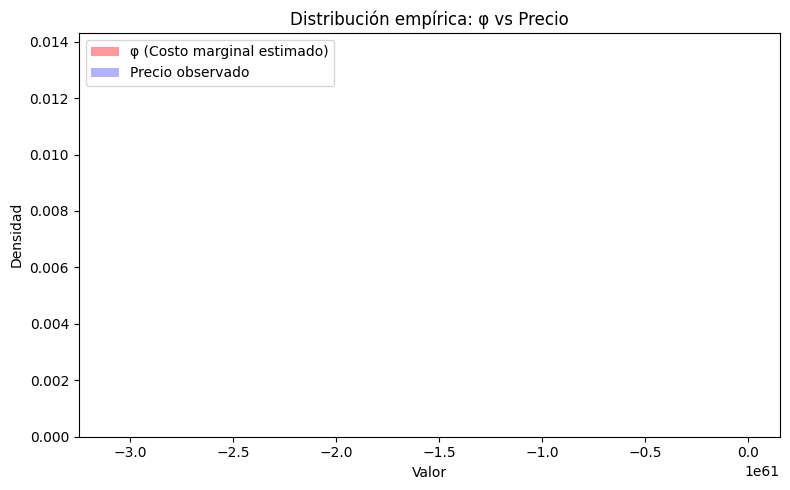

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

phi = pd.to_numeric(df_result2['phi'], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()
precio = pd.to_numeric(df_result2['precio_d'], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(8,5))
plt.hist(phi, bins=50, density=True, color="red", alpha=0.4, label="φ (Costo marginal estimado)")
plt.hist(precio, bins=50, density=True, color="blue", alpha=0.3, label="Precio observado")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Distribución empírica: φ vs Precio")
plt.legend()
plt.tight_layout()
plt.show()



## Agregar a nivel hora y graficar bids y valuaciones estimadas

In [60]:
import os

# Crear carpeta principal
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

# Calcular número de fechas únicas
n_fechas = df_result2["Fecha"].nunique()

# Crear subcarpeta con el número de fechas únicas
sub_dir = os.path.join(output_dir, f"fechas_{n_fechas}")
os.makedirs(sub_dir, exist_ok=True)

print(f"Carpeta creada: {sub_dir}")


Carpeta creada: results\fechas_2


In [67]:
df_result2[df_result2['phi']<0]

,Fecha,CodigoPlanta,numerador,denominador,precio_d,phi
13,2025-05-05,CTG1,9.360000e+05,-6.118038e-13,1722.81,-1.529902e+18
14,2025-05-05,CTG2,7.200000e+05,-4.706183e-13,1632.42,-1.529902e+18
52,2025-05-05,TCDT,1.540791e+07,-2.769530e+01,758.72,-5.555779e+05
53,2025-05-05,TDR1,2.208000e+06,-7.136684e-56,2129.06,-3.093874e+61
54,2025-05-05,TEC1,9.360000e+05,-9.202509e-40,1488.84,-1.017114e+45
59,2025-05-05,TRM1,1.128000e+06,-3.645915e-56,1961.02,-3.093874e+61
85,2025-05-06,CTG1,9.360000e+05,-1.953428e-12,1648.57,-4.791576e+17
86,2025-05-06,CTG2,7.200000e+05,-1.502637e-12,1737.65,-4.791576e+17
125,2025-05-06,TDR1,2.208000e+06,-7.136684e-56,2129.06,-3.093874e+61
126,2025-05-06,TEC1,7.200000e+05,-1.817156e-50,1488.84,-3.962235e+55


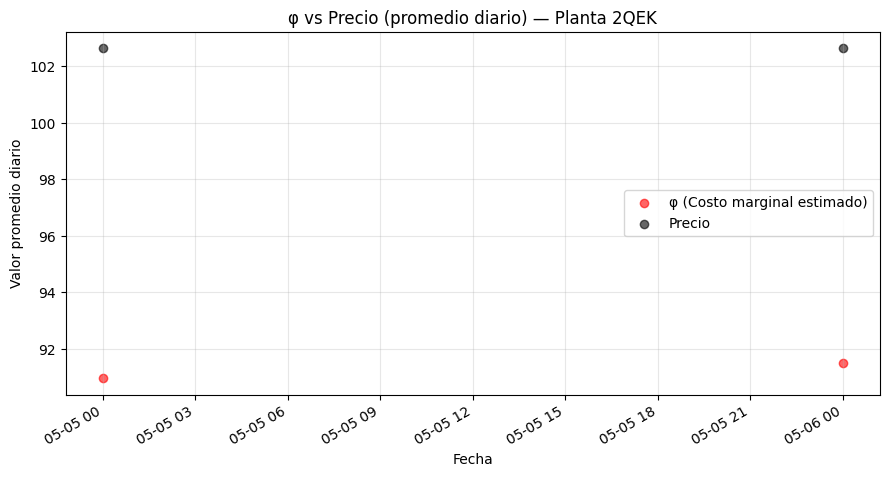

✅ Gráfico guardado: results\fechas_2\phi_precio_2QEK_2025-05-05_to_2025-05-06_M1.png


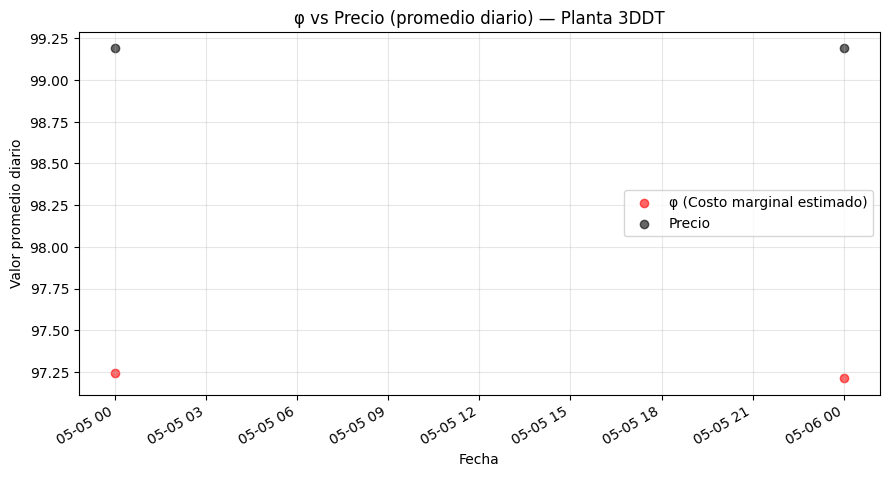

✅ Gráfico guardado: results\fechas_2\phi_precio_3DDT_2025-05-05_to_2025-05-06_M1.png


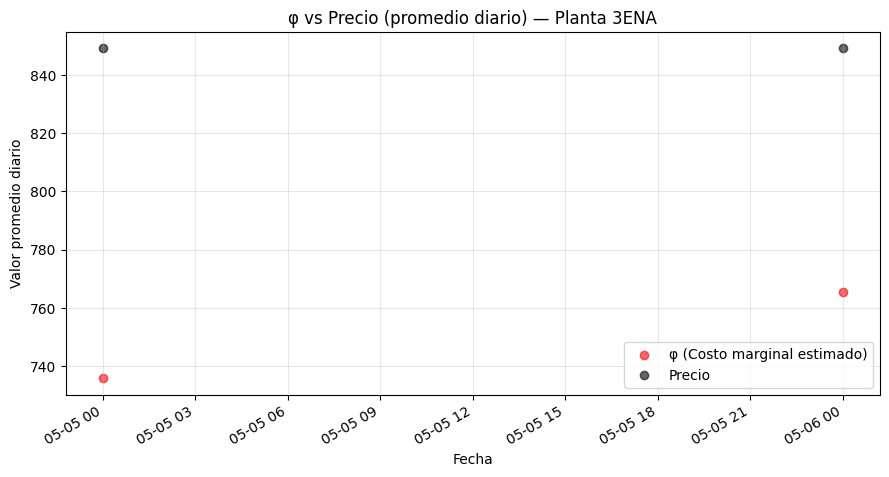

✅ Gráfico guardado: results\fechas_2\phi_precio_3ENA_2025-05-05_to_2025-05-06_M1.png


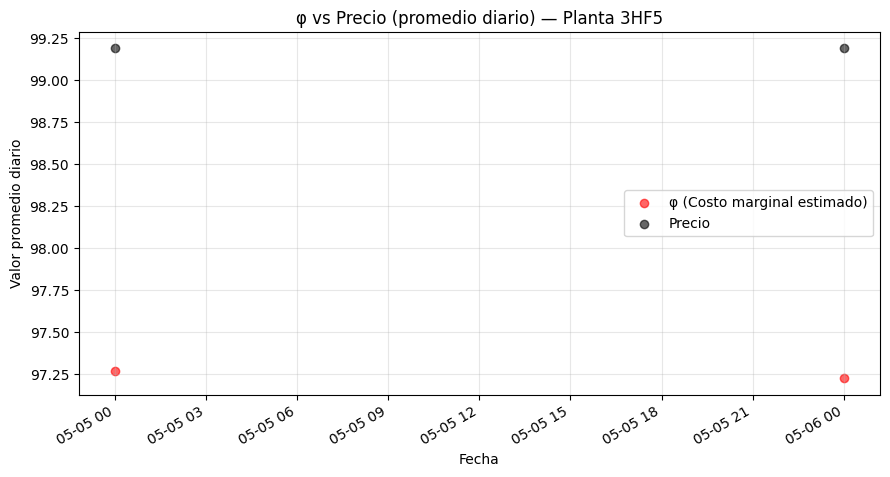

✅ Gráfico guardado: results\fechas_2\phi_precio_3HF5_2025-05-05_to_2025-05-06_M1.png


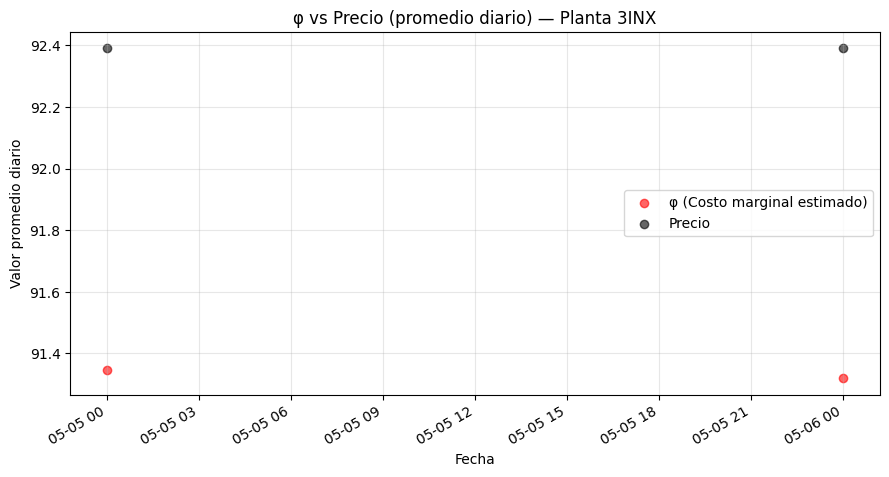

✅ Gráfico guardado: results\fechas_2\phi_precio_3INX_2025-05-05_to_2025-05-06_M1.png


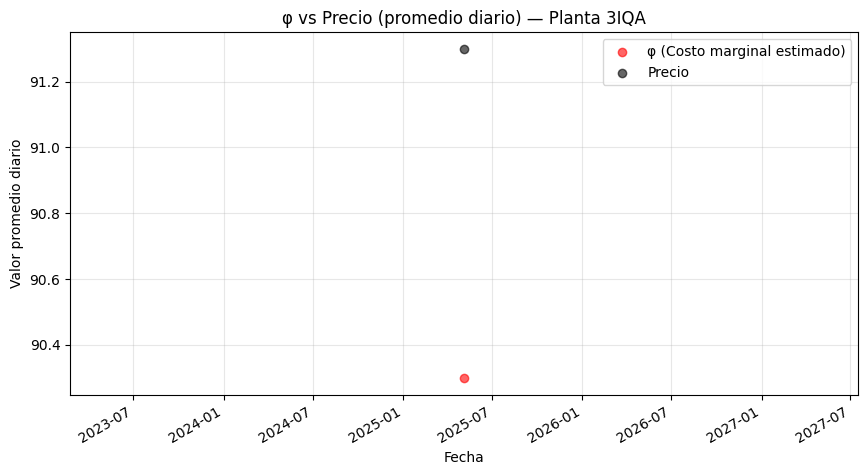

✅ Gráfico guardado: results\fechas_2\phi_precio_3IQA_2025-05-05_to_2025-05-05_M1.png


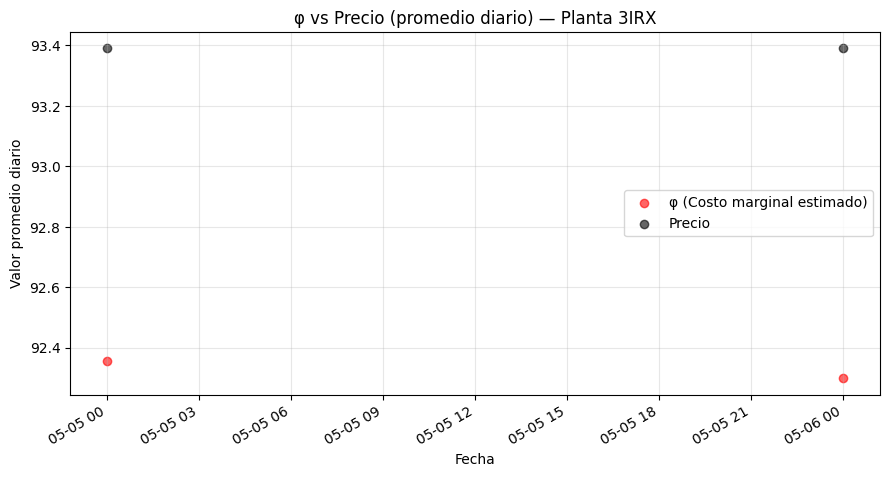

✅ Gráfico guardado: results\fechas_2\phi_precio_3IRX_2025-05-05_to_2025-05-06_M1.png


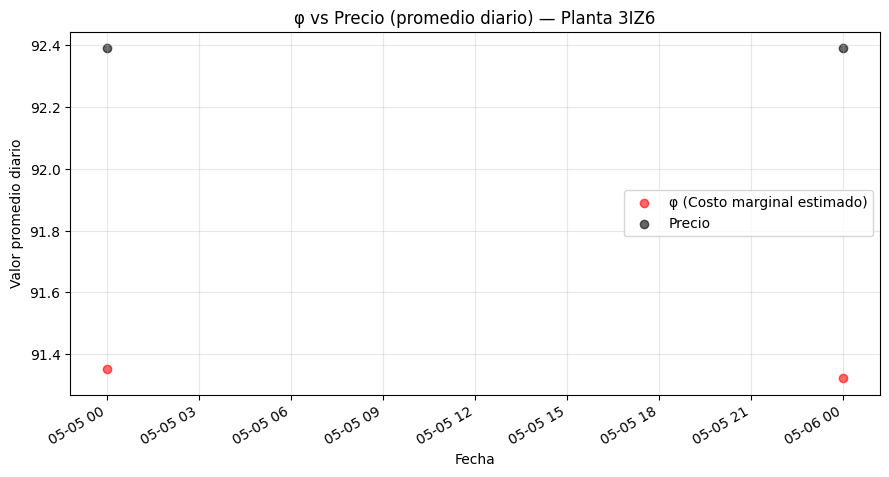

✅ Gráfico guardado: results\fechas_2\phi_precio_3IZ6_2025-05-05_to_2025-05-06_M1.png


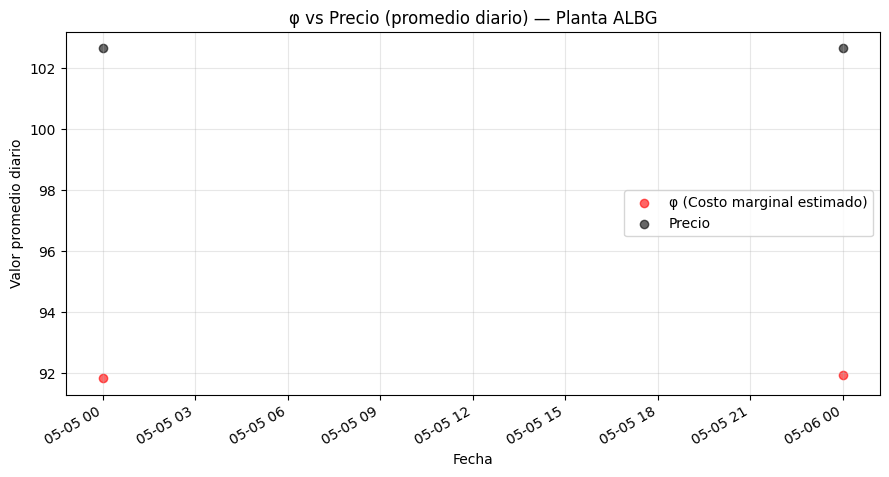

✅ Gráfico guardado: results\fechas_2\phi_precio_ALBG_2025-05-05_to_2025-05-06_M1.png


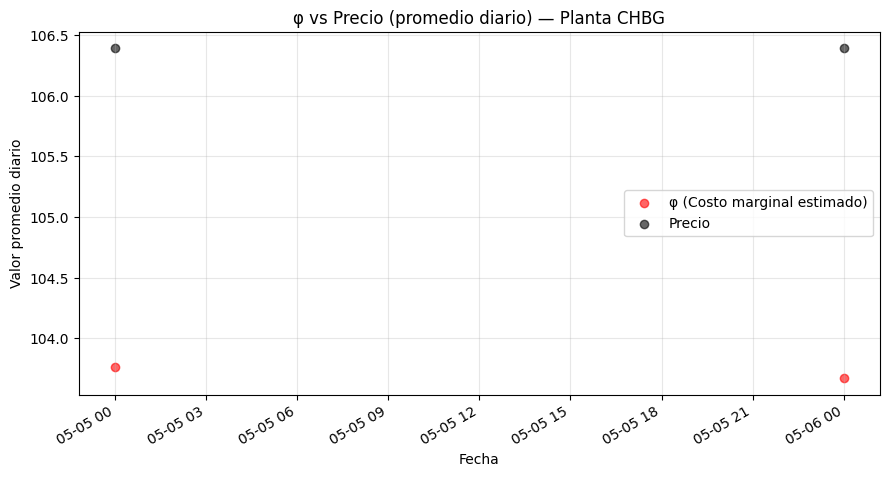

✅ Gráfico guardado: results\fechas_2\phi_precio_CHBG_2025-05-05_to_2025-05-06_M1.png


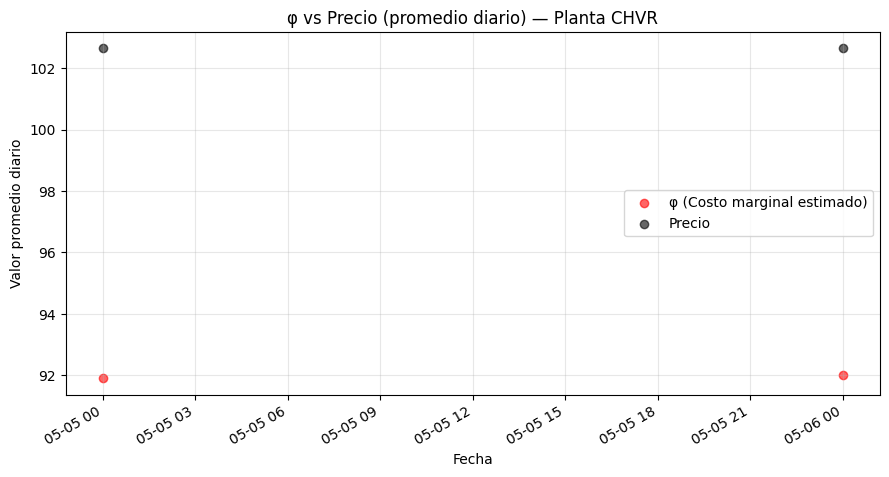

✅ Gráfico guardado: results\fechas_2\phi_precio_CHVR_2025-05-05_to_2025-05-06_M1.png


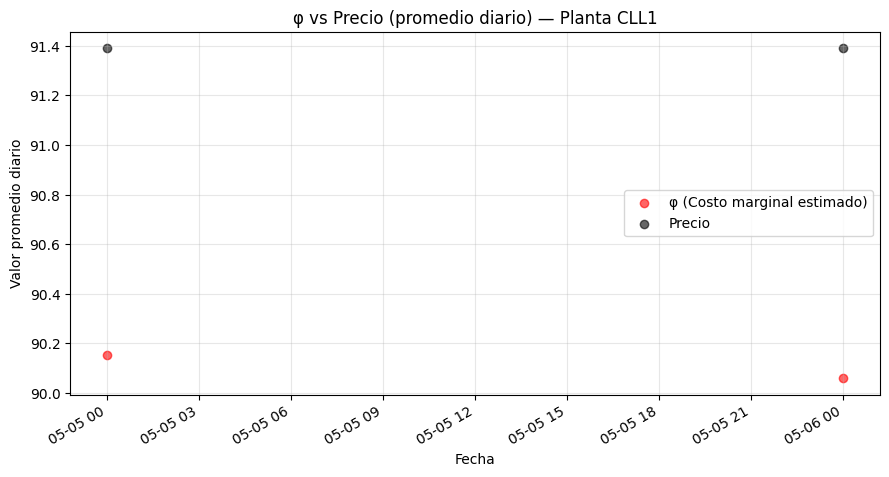

✅ Gráfico guardado: results\fechas_2\phi_precio_CLL1_2025-05-05_to_2025-05-06_M1.png


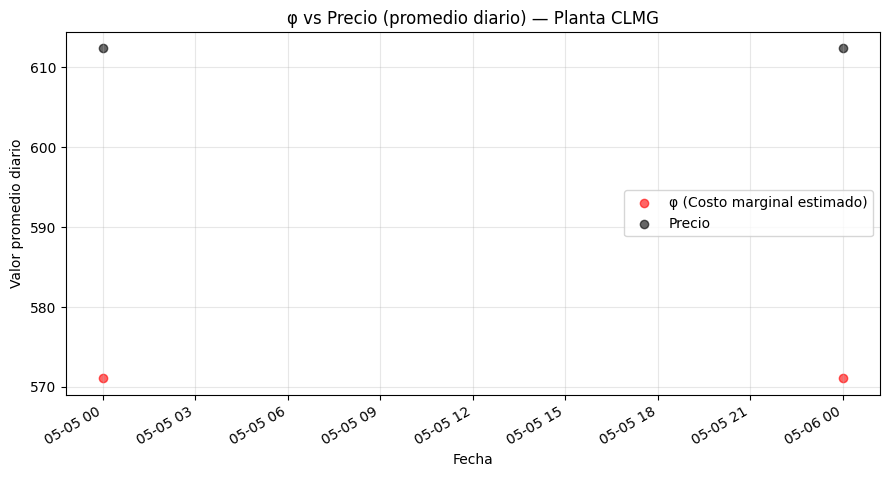

✅ Gráfico guardado: results\fechas_2\phi_precio_CLMG_2025-05-05_to_2025-05-06_M1.png


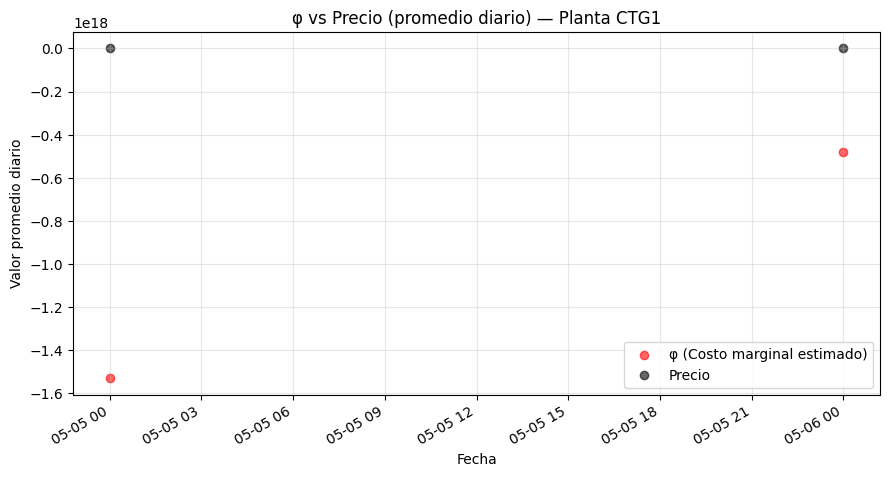

✅ Gráfico guardado: results\fechas_2\phi_precio_CTG1_2025-05-05_to_2025-05-06_M1.png


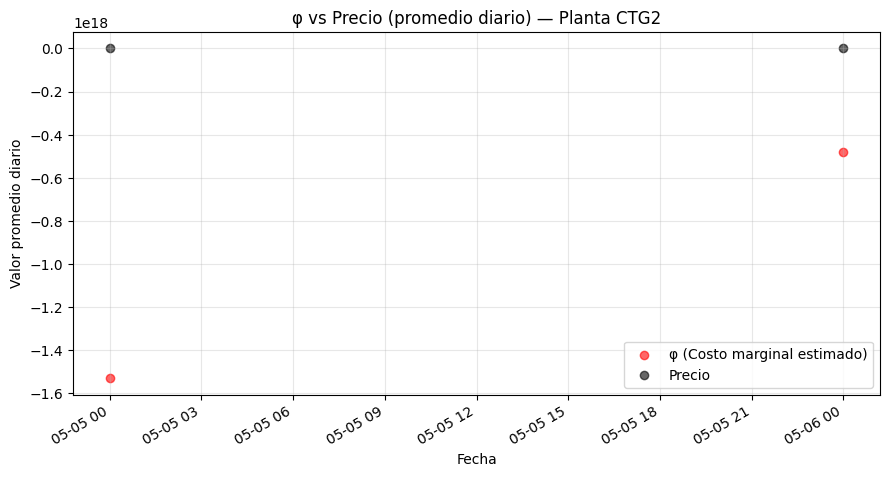

✅ Gráfico guardado: results\fechas_2\phi_precio_CTG2_2025-05-05_to_2025-05-06_M1.png


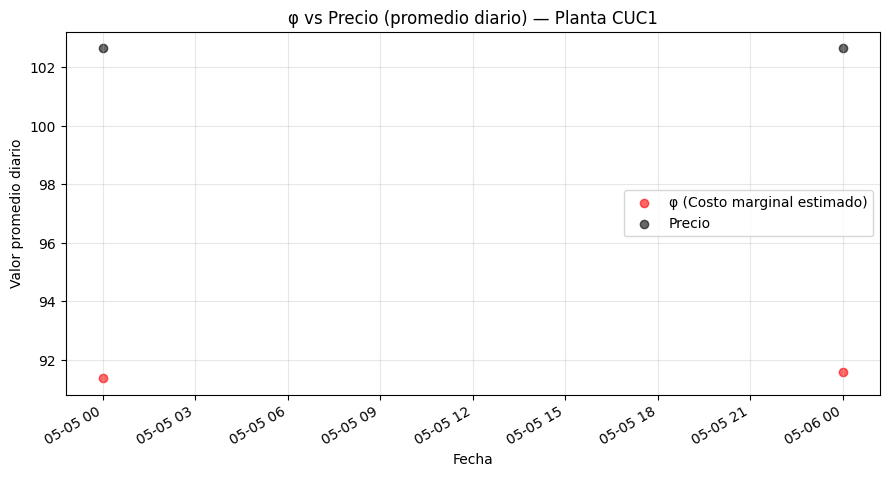

✅ Gráfico guardado: results\fechas_2\phi_precio_CUC1_2025-05-05_to_2025-05-06_M1.png


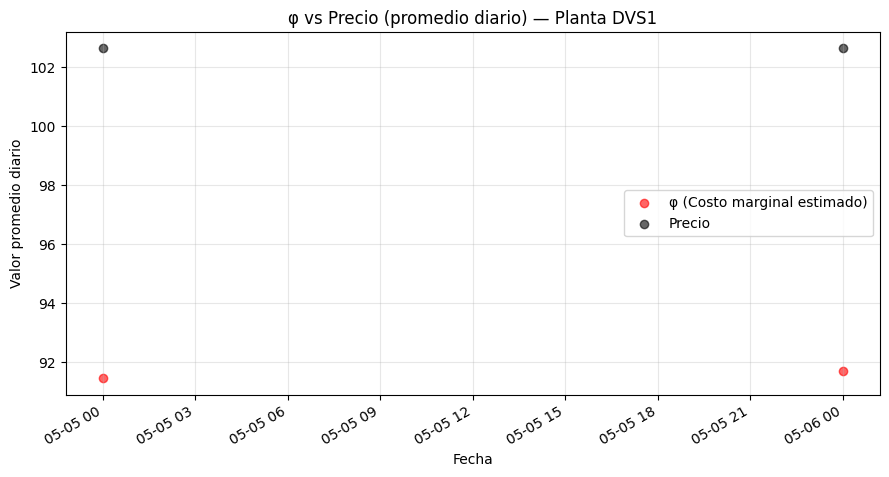

✅ Gráfico guardado: results\fechas_2\phi_precio_DVS1_2025-05-05_to_2025-05-06_M1.png


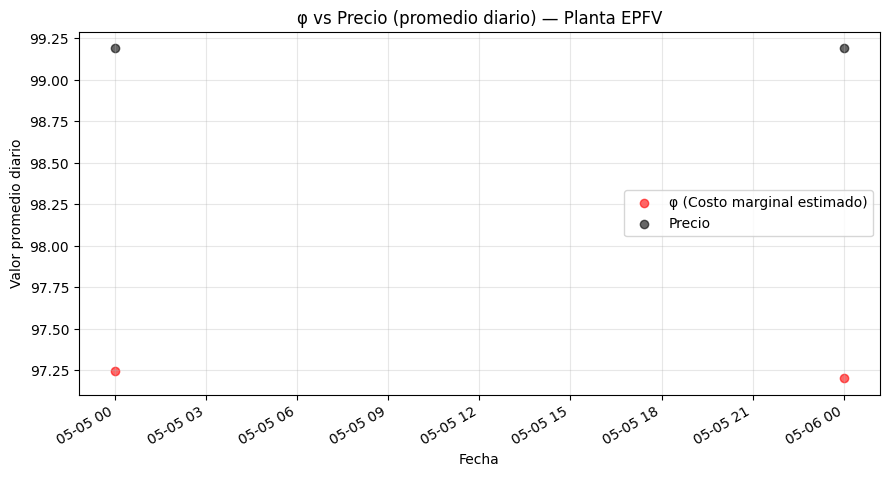

✅ Gráfico guardado: results\fechas_2\phi_precio_EPFV_2025-05-05_to_2025-05-06_M1.png


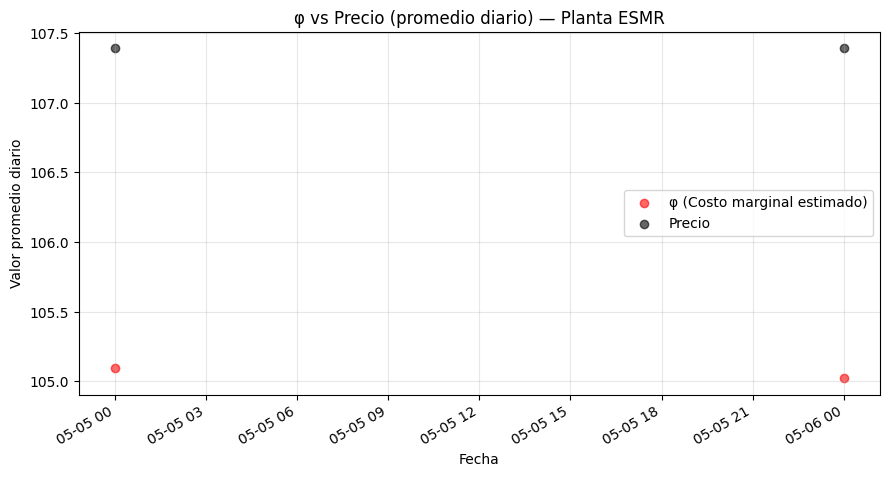

✅ Gráfico guardado: results\fechas_2\phi_precio_ESMR_2025-05-05_to_2025-05-06_M1.png


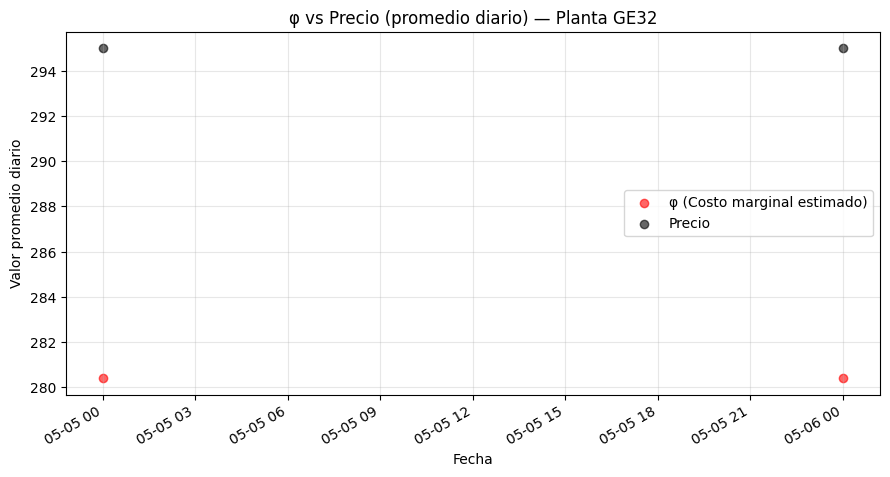

✅ Gráfico guardado: results\fechas_2\phi_precio_GE32_2025-05-05_to_2025-05-06_M1.png


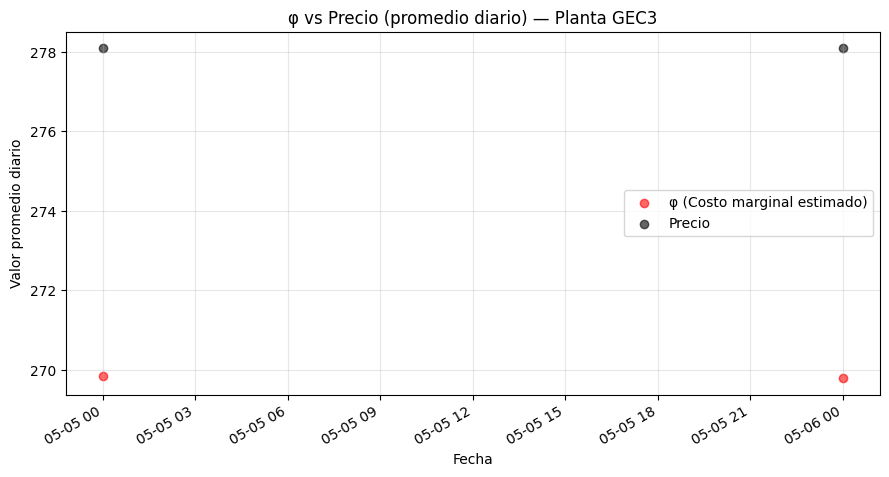

✅ Gráfico guardado: results\fechas_2\phi_precio_GEC3_2025-05-05_to_2025-05-06_M1.png


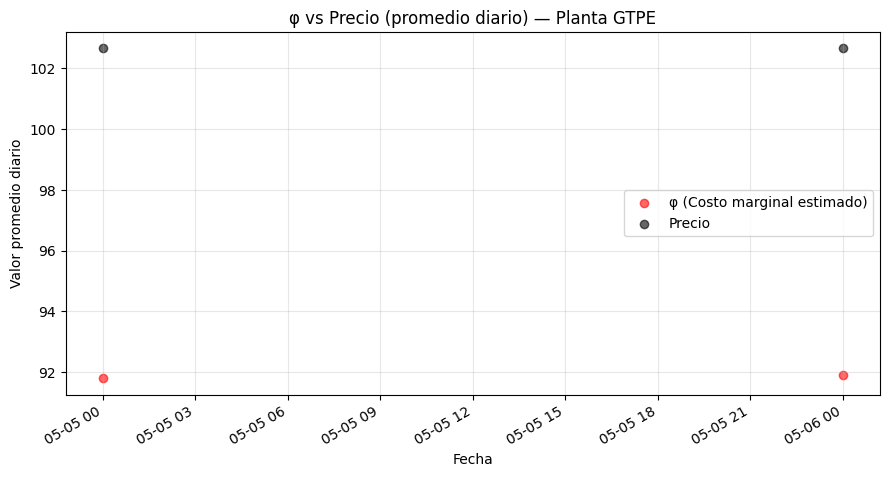

✅ Gráfico guardado: results\fechas_2\phi_precio_GTPE_2025-05-05_to_2025-05-06_M1.png


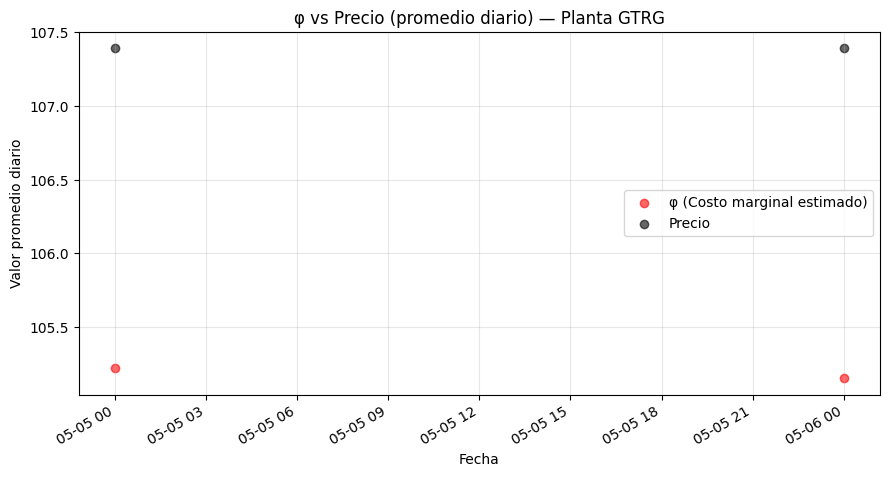

✅ Gráfico guardado: results\fechas_2\phi_precio_GTRG_2025-05-05_to_2025-05-06_M1.png


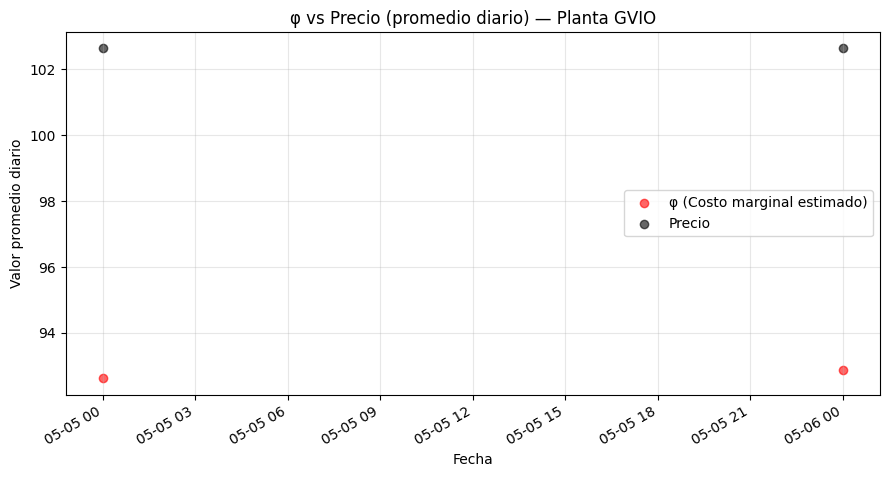

✅ Gráfico guardado: results\fechas_2\phi_precio_GVIO_2025-05-05_to_2025-05-06_M1.png


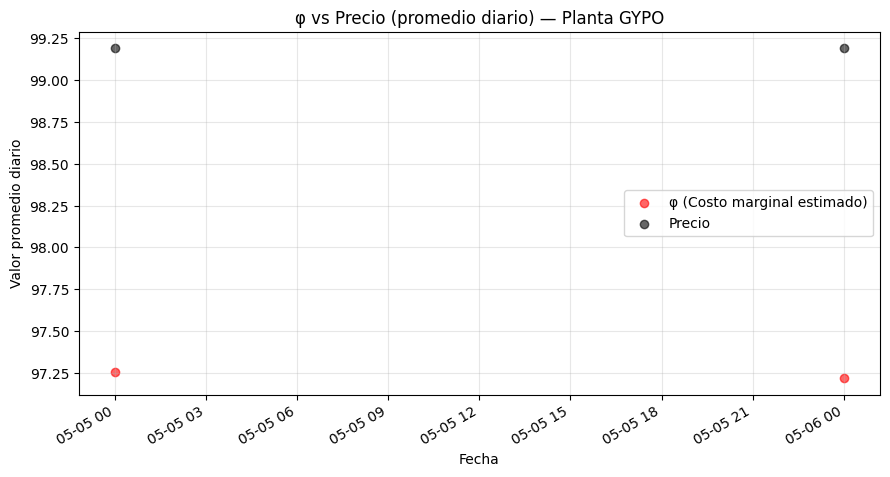

✅ Gráfico guardado: results\fechas_2\phi_precio_GYPO_2025-05-05_to_2025-05-06_M1.png


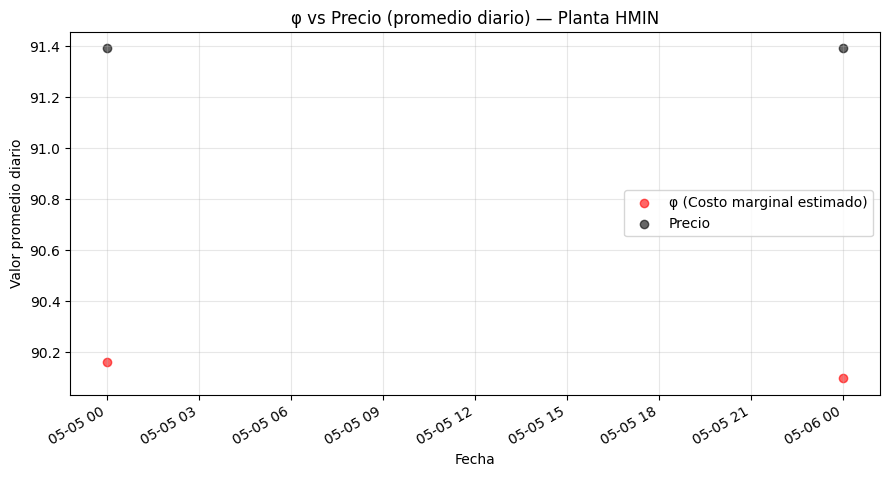

✅ Gráfico guardado: results\fechas_2\phi_precio_HMIN_2025-05-05_to_2025-05-06_M1.png


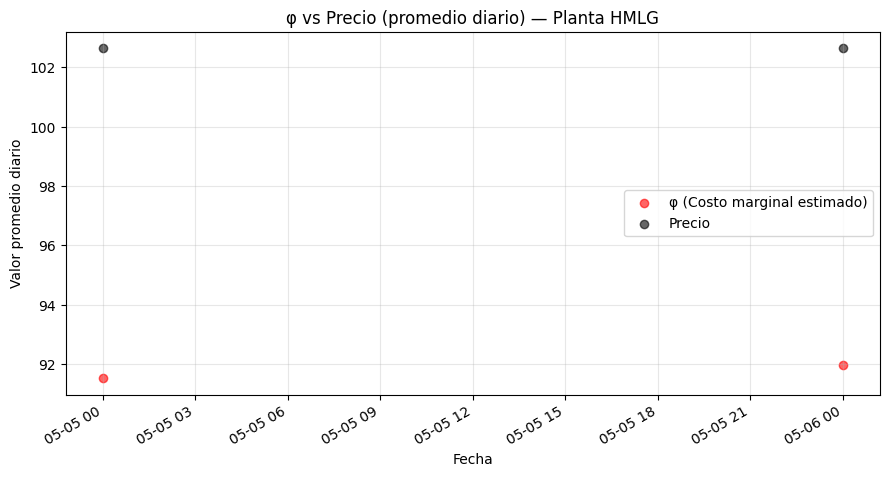

✅ Gráfico guardado: results\fechas_2\phi_precio_HMLG_2025-05-05_to_2025-05-06_M1.png


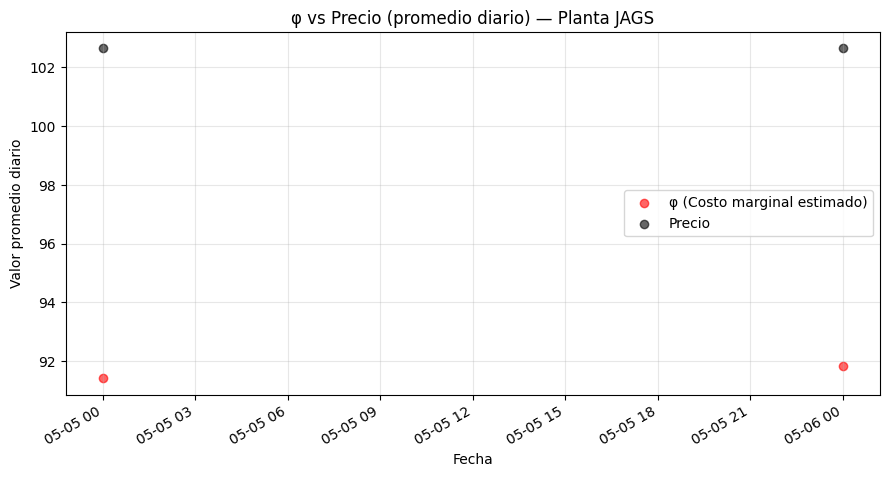

✅ Gráfico guardado: results\fechas_2\phi_precio_JAGS_2025-05-05_to_2025-05-06_M1.png


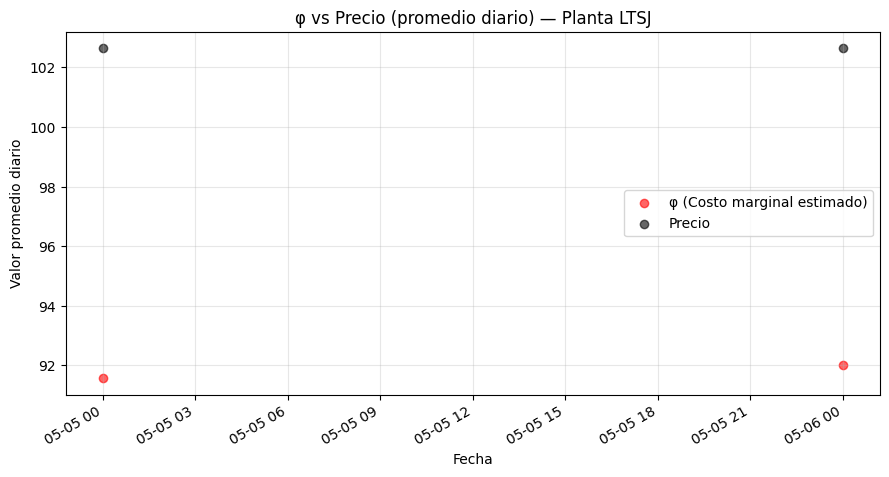

✅ Gráfico guardado: results\fechas_2\phi_precio_LTSJ_2025-05-05_to_2025-05-06_M1.png


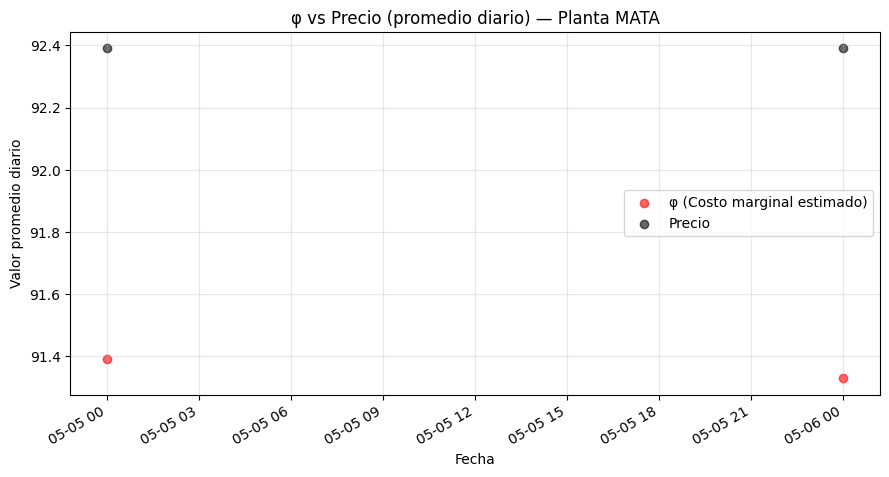

✅ Gráfico guardado: results\fechas_2\phi_precio_MATA_2025-05-05_to_2025-05-06_M1.png


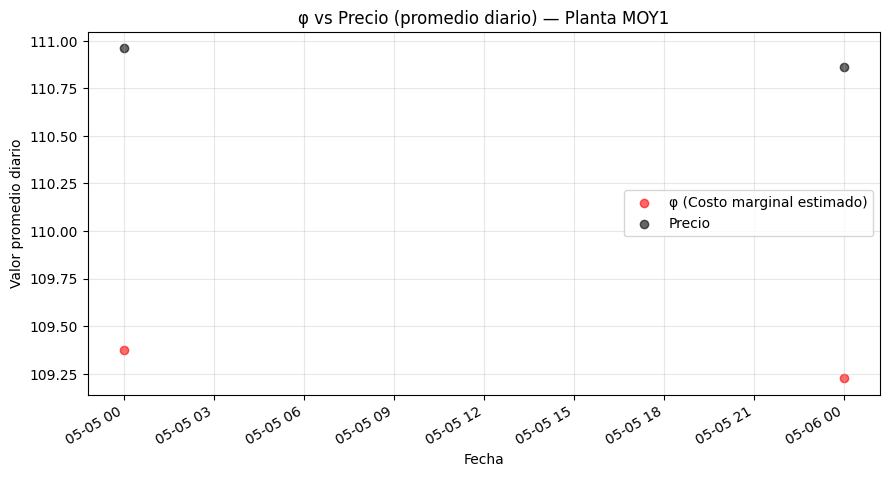

✅ Gráfico guardado: results\fechas_2\phi_precio_MOY1_2025-05-05_to_2025-05-06_M1.png


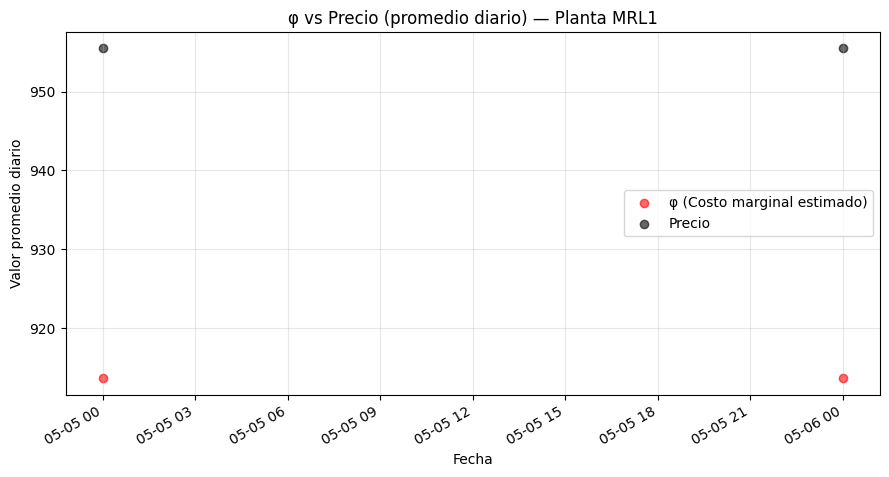

✅ Gráfico guardado: results\fechas_2\phi_precio_MRL1_2025-05-05_to_2025-05-06_M1.png


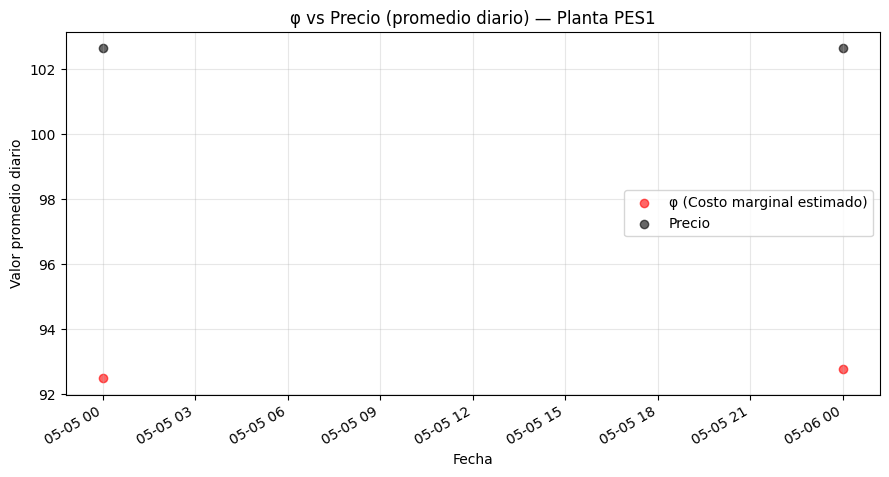

✅ Gráfico guardado: results\fechas_2\phi_precio_PES1_2025-05-05_to_2025-05-06_M1.png


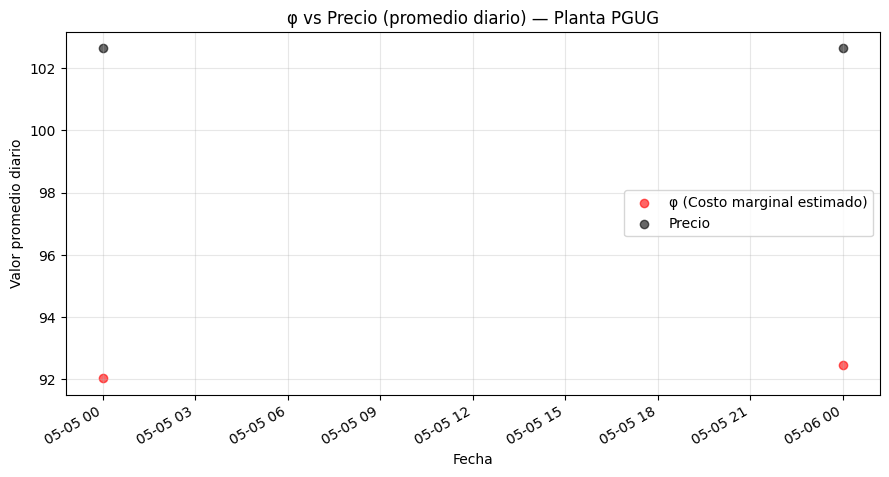

✅ Gráfico guardado: results\fechas_2\phi_precio_PGUG_2025-05-05_to_2025-05-06_M1.png


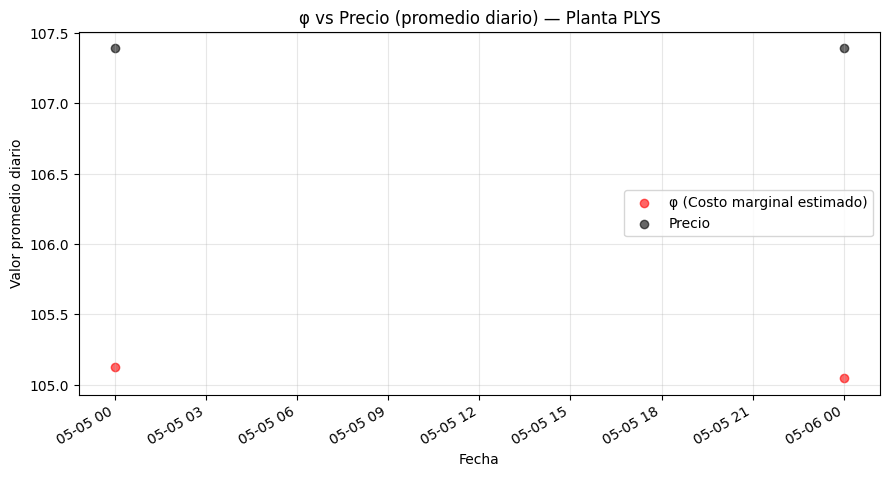

✅ Gráfico guardado: results\fechas_2\phi_precio_PLYS_2025-05-05_to_2025-05-06_M1.png


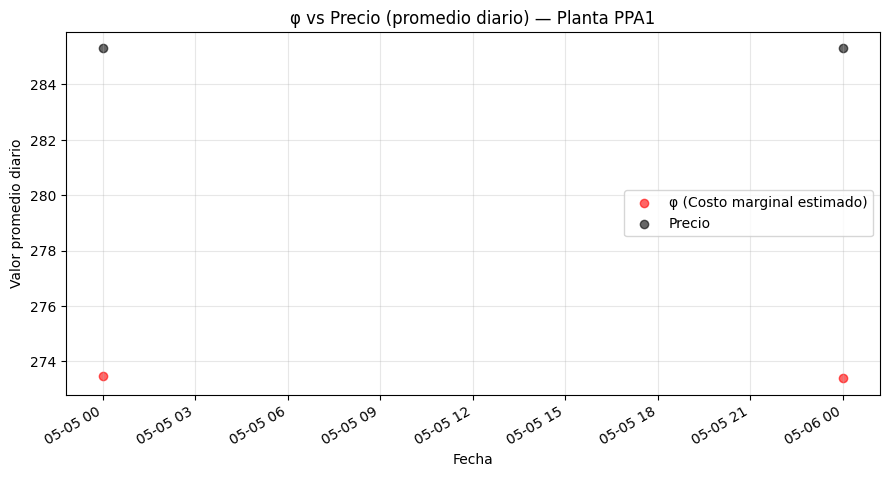

✅ Gráfico guardado: results\fechas_2\phi_precio_PPA1_2025-05-05_to_2025-05-06_M1.png


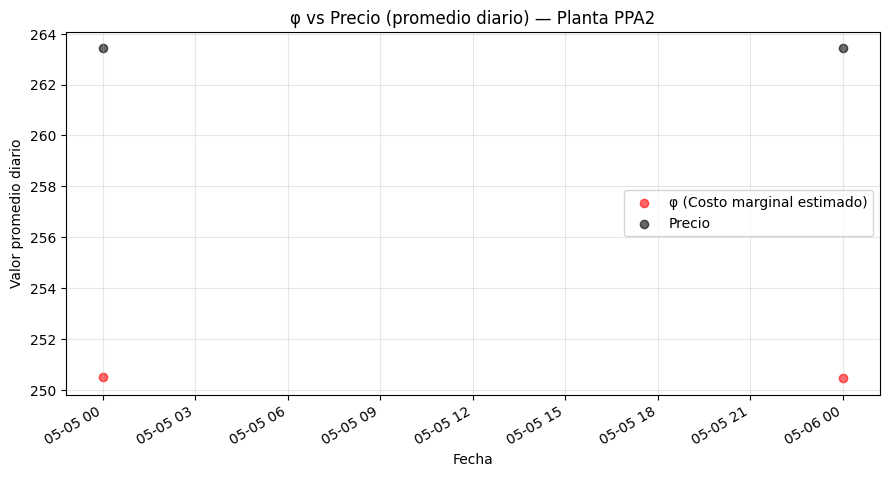

✅ Gráfico guardado: results\fechas_2\phi_precio_PPA2_2025-05-05_to_2025-05-06_M1.png


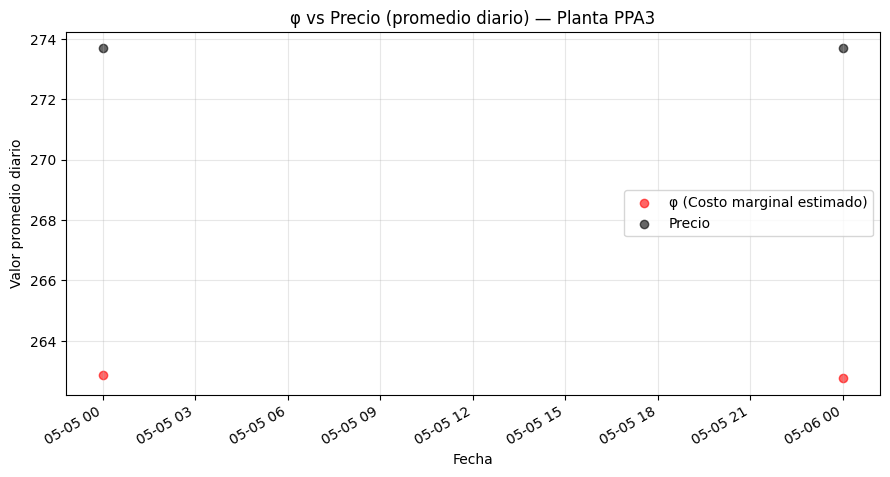

✅ Gráfico guardado: results\fechas_2\phi_precio_PPA3_2025-05-05_to_2025-05-06_M1.png


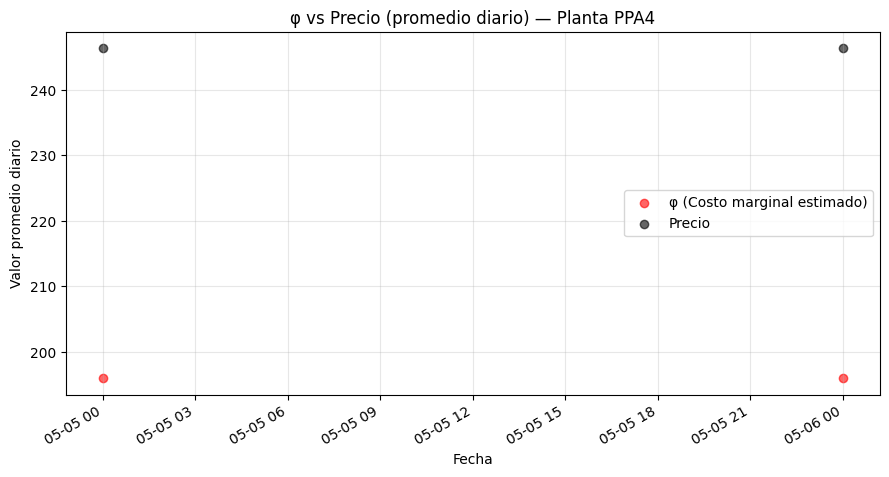

✅ Gráfico guardado: results\fechas_2\phi_precio_PPA4_2025-05-05_to_2025-05-06_M1.png


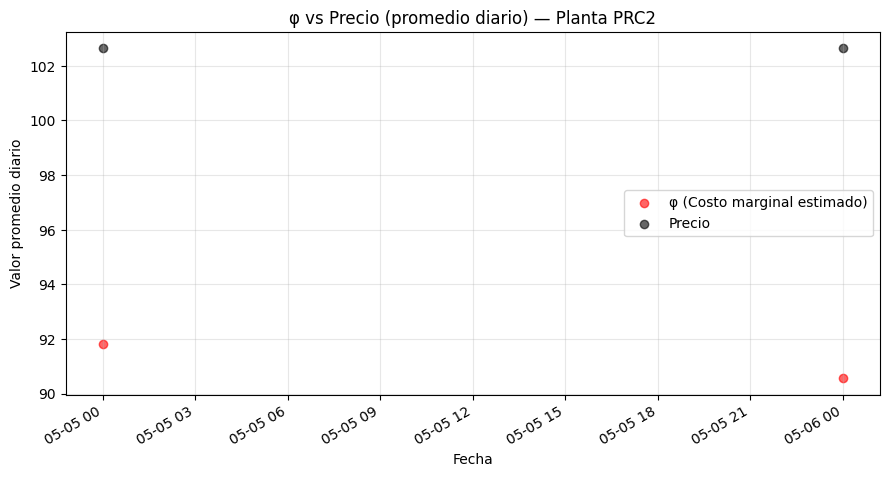

✅ Gráfico guardado: results\fechas_2\phi_precio_PRC2_2025-05-05_to_2025-05-06_M1.png


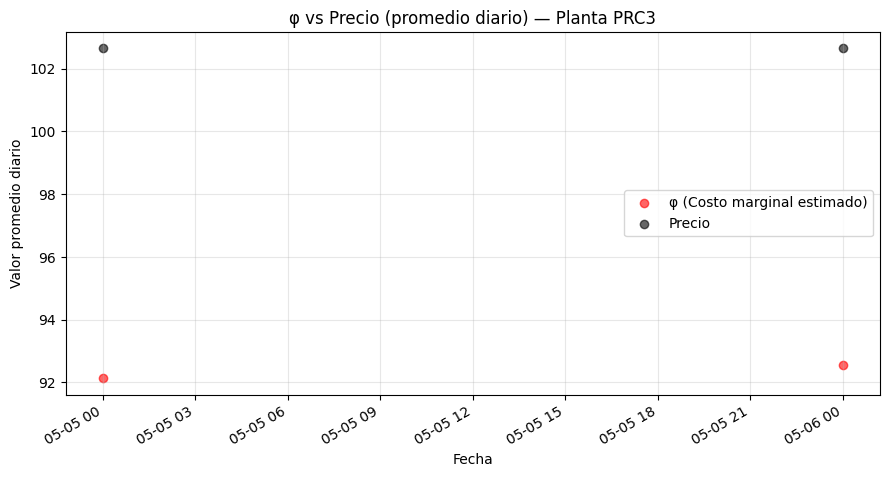

✅ Gráfico guardado: results\fechas_2\phi_precio_PRC3_2025-05-05_to_2025-05-06_M1.png


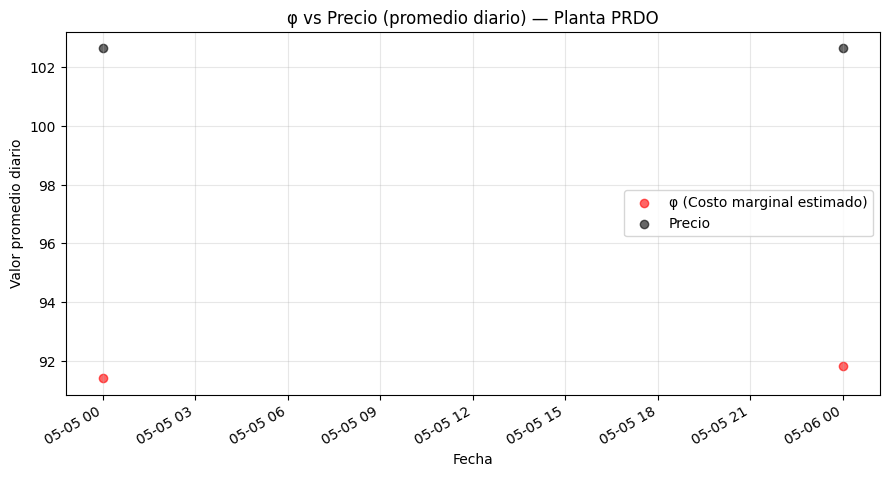

✅ Gráfico guardado: results\fechas_2\phi_precio_PRDO_2025-05-05_to_2025-05-06_M1.png


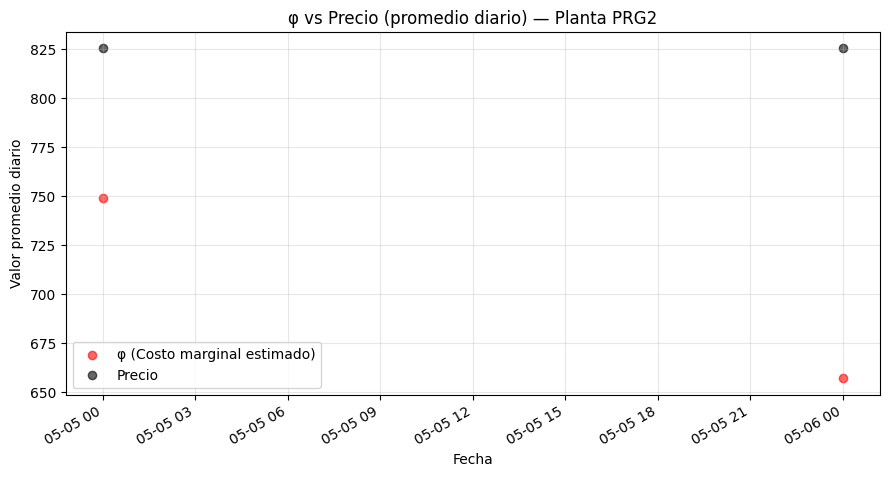

✅ Gráfico guardado: results\fechas_2\phi_precio_PRG2_2025-05-05_to_2025-05-06_M1.png


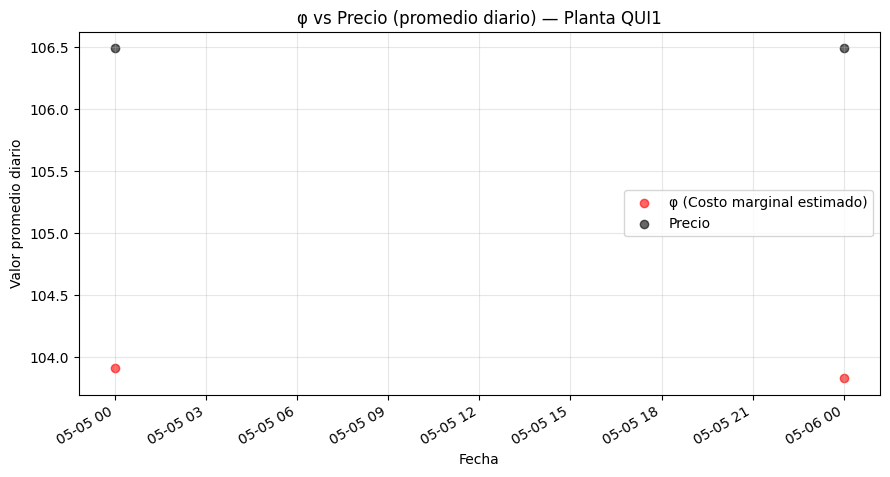

✅ Gráfico guardado: results\fechas_2\phi_precio_QUI1_2025-05-05_to_2025-05-06_M1.png


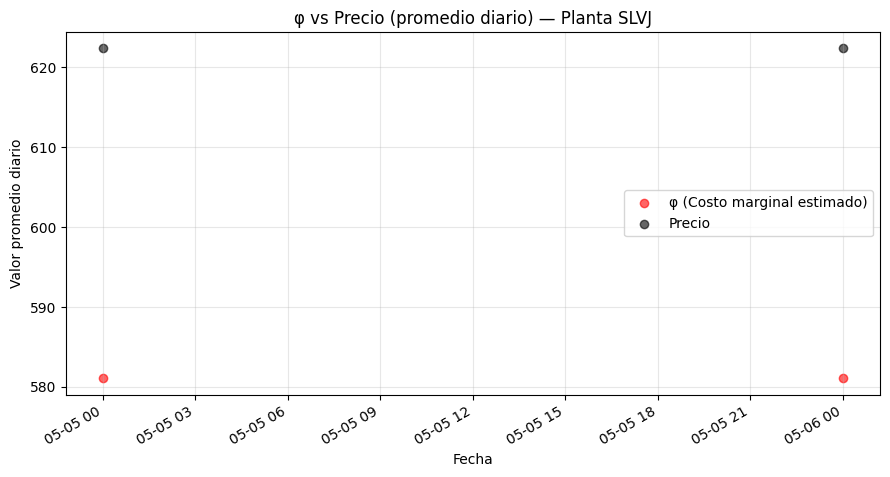

✅ Gráfico guardado: results\fechas_2\phi_precio_SLVJ_2025-05-05_to_2025-05-06_M1.png


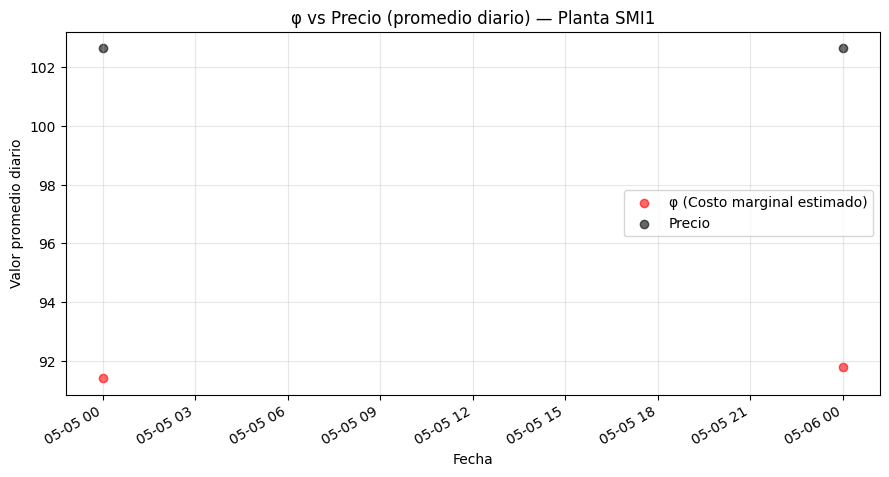

✅ Gráfico guardado: results\fechas_2\phi_precio_SMI1_2025-05-05_to_2025-05-06_M1.png


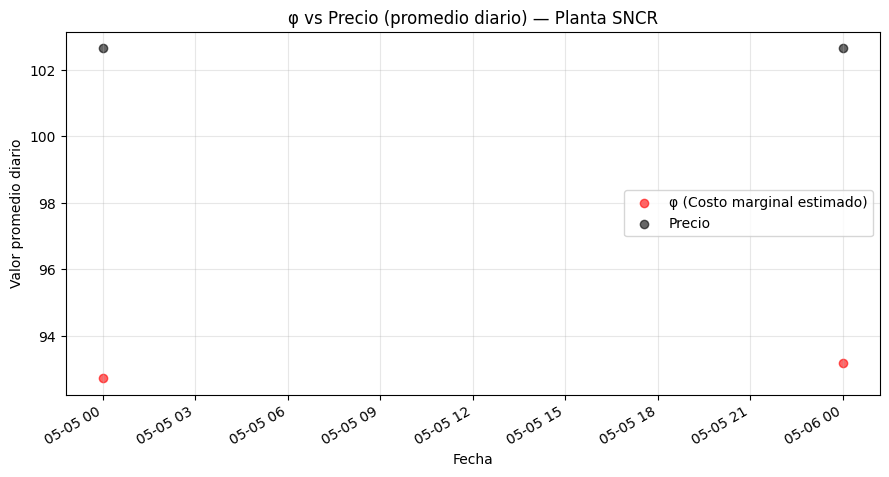

✅ Gráfico guardado: results\fechas_2\phi_precio_SNCR_2025-05-05_to_2025-05-06_M1.png


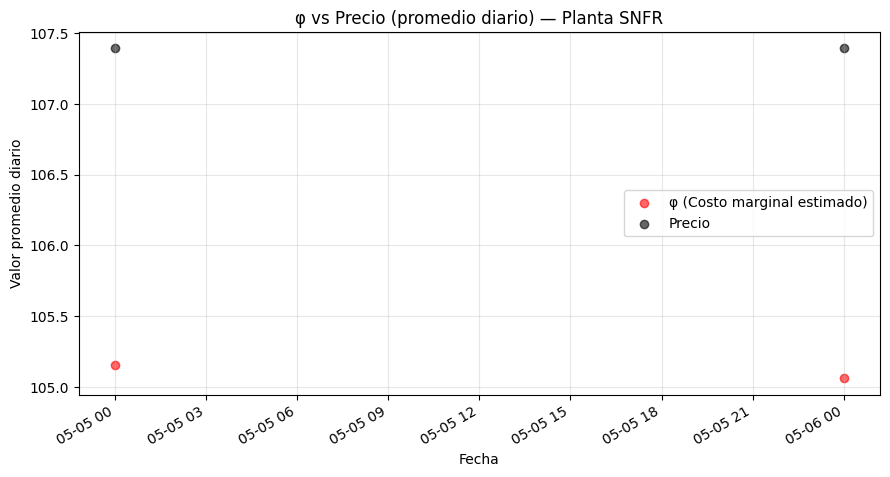

✅ Gráfico guardado: results\fechas_2\phi_precio_SNFR_2025-05-05_to_2025-05-06_M1.png


KeyboardInterrupt: 

In [61]:
import os
import matplotlib.pyplot as plt
import pandas as pd

M=1
# --- Asegurar formatos ---
df_result2['phi'] = pd.to_numeric(df_result2['phi'], errors='coerce')
df_result2['precio_d'] = pd.to_numeric(df_result2['precio_d'], errors='coerce')


# --- Filtrar filas válidas ---
df_result2 = df_result2.dropna(subset=['Fecha', 'CodigoPlanta', 'phi', 'precio_d'])

# --- Iterar sobre cada planta ---
for planta in df_result2['CodigoPlanta'].unique():
    df_planta = (
        df_result2[df_result2['CodigoPlanta'] == planta]
        .groupby('Fecha', as_index=False)[['phi', 'precio_d']].mean()
        .sort_values('Fecha')
    )

    plt.figure(figsize=(9, 5))
    plt.scatter(df_planta['Fecha'], df_planta['phi'], color='red', label='φ (Costo marginal estimado)', alpha=0.6)
    plt.scatter(df_planta['Fecha'], df_planta['precio_d'], color='black', label='Precio', alpha=0.6)

    plt.xlabel("Fecha")
    plt.ylabel("Valor promedio diario")
    plt.title(f"φ vs Precio (promedio diario) — Planta {planta}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.gcf().autofmt_xdate()

    # --- Guardar figura ---
    fecha_min = df_planta['Fecha'].min()
    fecha_max = df_planta['Fecha'].max()
    filename = f"phi_precio_{planta}_{fecha_min}_to_{fecha_max}_M{M}.png"
    filepath = os.path.join(sub_dir, filename)
    plt.savefig(filepath, dpi=300)
    plt.show()

    print(f"✅ Gráfico guardado: {filepath}")




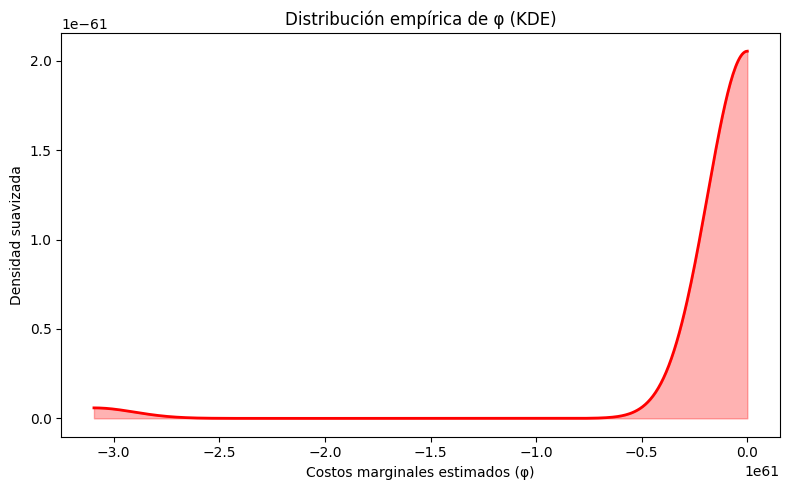

In [62]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

phi = pd.to_numeric(df_result2['phi'], errors='coerce').dropna()

# Calcular densidad KDE
kde = gaussian_kde(phi)
x_vals = np.linspace(phi.min(), phi.max(), 500)
y_vals = kde(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, color="red", linewidth=2)
plt.fill_between(x_vals, y_vals, color="red", alpha=0.3)
plt.xlabel("Costos marginales estimados (φ)")
plt.ylabel("Densidad suavizada")
plt.title("Distribución empírica de φ (KDE)")
plt.tight_layout()
plt.show()




In [63]:
df_result2['phi'].describe()

count    1.440000e+02
mean    -8.594097e+59
std      5.102081e+60
min     -3.093874e+61
25%      9.180512e+01
50%      9.721604e+01
75%      2.938820e+02
max      1.181536e+03
Name: phi, dtype: float64